# Variable corrolation

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:

%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
from random import randint 

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle as Pickle

In [2]:

%matplotlib inline

# import plotting and stats modules
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set option to display floating-point numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool

from sklearn.model_selection import train_test_split




### Import data

In [3]:
drive = "D"
date = "20240427"

In [4]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
#csv_file = r"{0}:\cdu\data\zonal_stats\output\{1}\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(drive, date)
csv_file = r"{0}:\cdu\data\latest_biomass_data\20240402\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv".format(drive)

In [11]:
csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv"
#csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_mask_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_annual_density_near_met_si_fire.csv"

## Set output file locations

In [12]:
output = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date)
output_ = os.path.join(output, "plots")

In [13]:
if not os.path.isdir(output):
    os.mkdir(output)
if not os.path.isdir(output_):
    os.mkdir(output_)

In [14]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(188, 297)
['uid', 'site_clean', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'basal_dt', 'im_date', 'band', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec', 's_date', 'e_date', 'image_s_dt', 'image_e_dt', 'area_ha', 'jan_per', 'feb_per', 'mar_per', 'april_per', 'may_per', 'june_per', 'july_per', 'aug_per', 'sep_per', 'oct_per', 'nov_per', 'dec_per', 'burnt_enco', 'burnt_cat', 'fire_sn_ord', 'fire_sn_cat', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'year', 'tot_an_emsi_avg', 'tot_an_emsi_avg_R', 'tot_an_emsi_avg_si', 'emsi_dt', 'tot_an_drsi_avg', 'tot_an_

In [15]:
df = df2.rename(columns={'bio_agb_kg1ha': 'target'})

In [16]:
df

uid  site_clean      date  lon_gda94  lat_gda94  bio_l_kg1ha  \
0      1  agb02.2012  20120417     131.01     -12.65         0.00   
1      2  amg01.2012  20120619     134.05     -16.38       413.63   
2      3  amg03.2012  20120620     134.03     -16.78         0.00   
3      4  amg05.2012  20120621     134.09     -16.73       833.61   
4      5  amg06.2012  20120621     134.09     -16.69       104.28   
..   ...         ...       ...        ...        ...          ...   
183  184   wh07.2012  20120725     130.86     -17.73         8.12   
184  185   wh08.2012  20120725     130.86     -17.80         0.00   
185  186   wh09.2012  20120725     130.83     -17.85         0.00   
186  187   wh13.2012  20120726     130.98     -17.48         0.00   
187  188   wh15.2012  20120727     130.95     -17.57         0.00   

     bio_t_kg1ha  bio_b_kg1ha  bio_w_kg1ha  bio_br_kg1ha  ...  dbifmdry_NDGI  \
0           0.00         0.00         0.00          0.00  ...       -1538462   
1         448.55      1310.22      3748.31       2886.44  ...       -1341991   
2           0.00         0.00         0.00          0.00  ...       -2629287   
3         906.47      3541.76     11522.39       8737.58  ...       -1173184   
4         113.39       443.05      1441.38       1093.02  ...       -1255729   
..           ...          ...          ...           ...  ...            ...   
183         8.83        34.49       112.20         85.08  ...       -1751216   
184         0.00         0.00         0.00          0.00  ...       -1711085   
185         0.00         0.00         0.00          0.00  ...       -1939035   
186         0.00         0.00         0.00          0.00  ...       -1670989   
187         0.00         0.00         0.00          0.00  ...       -1938944   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
0        1538462       1964774        -383207        1409000         2022182   
1        1341991       2881356        -338983        1438000         2197130   
2        2629287       1429988       -1452928        1629000         1787156   
3        1173184       2241024        -539075        1088000         1753382   
4        1255729       2197205        -836979        1094000         1668140   
..           ...           ...            ...            ...             ...   
183      1751216       -653378       -1646321        1345000         1214483   
184      1711085        742810        -791061        1523000         1587738   
185      1939035       2065458        -545833        1776000         1952017   
186      1670989       1488840        -458342        1218000         1131930   
187      1938944       1487304        -952381        1398000         1389131   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
0         1205000        2336781        4405850       6047316  
1         1283000        2534571        4947937       7201101  
2         1146000        2030475        3306405       4099401  
3          983000        2111557        4957136       7222079  
4          957000        1997912        4379863       5995724  
..            ...            ...            ...           ...  
183        841000        1367776        1991475       2236580  
184       1080000        1777875        2626459       3085874  
185       1318000        2163493        3185114       3909535  
186        767000        1290232        1958131       2194196  
187        928000        1577873        2428048       2811428  

[188 rows x 297 columns]

## Main only

In [17]:
# #main only
# var_ = "main_only"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", "major"]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

In [18]:
#main major and h99 
var_ = "main_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major", "h99"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

In [19]:
df2

site_clean   target  fire_mean  fire_major  rain_d_mean  et_ma_mean  \
0    agb02.2012     0.00       0.00           0         0.00        2.00   
1    amg01.2012  8376.22      10.00          10         0.00        0.10   
2    amg03.2012     0.00      10.00          10         0.00        0.20   
3    amg05.2012 24670.80       9.75          10         0.00        0.70   
4    amg06.2012  3086.16       5.00           5         0.00        0.70   
..          ...      ...        ...         ...          ...         ...   
183   wh07.2012   240.24       0.00           0         0.00        0.30   
184   wh08.2012     0.00       0.00           0         0.00        0.30   
185   wh09.2012     0.00       0.00           0         0.00        0.30   
186   wh13.2012     0.00       0.00           0         0.00        0.10   
187   wh15.2012     0.00       0.00           0         0.00        0.10   

     tmax_mean  tmin_mean  rh_tmax_mean  rh_tmin_mean  ...  b1_ccw_dry_mean  \
0        35.60      22.30       3319.00       3368.30  ...            68.00   
1        27.00       9.10       3294.40       3331.90  ...            66.00   
2        26.90       6.70       3296.00       3346.80  ...             6.92   
3        27.30       5.50       3301.90       3376.50  ...            54.75   
4        27.30       5.60       3302.10       3376.50  ...            48.33   
..         ...        ...           ...           ...  ...              ...   
183      30.20       9.20       3298.60       3358.20  ...             2.25   
184      30.10       9.10       3298.50       3357.90  ...            21.25   
185      30.00       9.00       3298.40       3357.60  ...            14.22   
186      30.00      12.40       3297.20       3337.70  ...            11.00   
187      25.00      12.70       3298.60       3324.20  ...             1.00   

     b1_dbifm_dry_mean  b1_dp1fm_dry_mean  b2_dp1fm_dry_mean  \
0               373.67              10.67              44.33   
1               292.44              11.22              32.22   
2               412.33               3.08               4.83   
3               223.58               8.75              37.25   
4               259.56               5.22              33.78   
..                 ...                ...                ...   
183             738.67              35.33               5.75   
184             692.08              30.33              19.67   
185             582.56               1.78              15.67   
186             710.88              21.38               2.50   
187             625.56               5.78               2.00   

     b3_dp1fm_dry_mean  b2_dbifm_dry_mean  b3_dbifm_dry_mean  \
0                43.67             561.00             765.67   
1                55.22             500.78             655.89   
2                90.42             677.25            1160.92   
3                52.75             395.83             500.67   
4                59.44             477.00             614.67   
..                 ...                ...                ...   
183              57.50            1187.67            1691.17   
184              48.42            1073.92            1516.33   
185              81.11             952.56            1410.00   
186              74.56            1124.31            1575.38   
187              90.67             977.56            1447.78   

     b4_dbifm_dry_mean  b5_dbifm_dry_mean  b6_dbifm_dry_mean  
0              1970.00            2127.00            1323.67  
1              1938.89            2074.78            1071.33  
2              2306.50            3090.50            1729.75  
3              1483.50            1652.17             940.25  
4              1571.89            1858.22            1005.33  
..                 ...                ...                ...  
183            2532.92            3530.42            2886.00  
184            2596.75            3042.00            2237.25  
185            2728.56            3043

### Logical selection

## dp1_dbi_si_dry_mask_density_near_met_si_fire.csv

In [20]:
df2 =df[['site_clean', 
 'target', 
 'fire_count', 
 'fire_min', 
 'fire_max', 
 'fire_mean', 
 'fire_sum', 
 'fire_std', 
 'fire_med', 
 'fire_major', 
 'fire_minor', 
#  'jan', 
#  'feb', 
#  'mar', 
#  'april', 
#  'may', 
#  'june', 
#  'july', 
#  'aug', 
#  'sep', 
#  'oct', 
#  'nov', 
#  'dec', 
#   'jan_per', 
#  'feb_per', 
#  'mar_per', 
#  'april_per', 
#  'may_per', 
#  'june_per', 
#  'july_per', 
#  'aug_per',
#  'sep_per', 
#  'oct_per', 
#  'nov_per', 
#  'dec_per', 
 'burnt_enco', 
#  'burnt_cat', 
 'fire_sn_ord', 
#  'fire_sn_cat', 
 'fire_f', 
 'fire_tot', 
 'since_fire', 
 'fire_gap', 
 'fire_pois1_2', 
 'fire_pois1_5', 
 'fire_pois1_10', 
#  'tot_an_emsi_avg', 
#  'tot_an_emsi_avg_R', 
 'tot_an_emsi_avg_si', 
#  'emsi_dt', 
#  'tot_an_drsi_avg', 
#  'tot_an_drsi_avg_R', 
 'tot_an_drsi_avg_si', 
#  'drsi_dt', 
 'tot_avg_emse_djf', 
 'tot_avg_emse_mam', 
 'tot_avg_emse_jja', 
 'tot_avg_emse_son', 
 'tot_avg_emse_dry', 
 'tot_avg_emse_wet', 
 'tot_avg_emse_annual', 
#  'emse_dt', 
 'tot_avg_drse_djf', 
 'tot_avg_drse_mam', 
 'tot_avg_drse_jja', 
 'tot_avg_drse_son', 
 'tot_avg_drse_dry', 
 'tot_avg_drse_wet', 
 'tot_avg_drse_annual', 
#  'drse_dt', 
 'rain_d_mean', 
 'et_ma_mean', 
 'tmax_mean', 
 'tmin_mean', 
 'rh_tmax_mean', 
 'rh_tmin_mean', 
#  'b1_wfp_dry_min', 
#  'b1_wfp_dry_max', 
 'b1_wfp_dry_mean', 
#  'b1_wfp_dry_std', 
#  'b1_wfp_dry_med', 
#  'b1_wfp_dry_p25', 
 'b1_wfp_dry_p50', 
#  'b1_wfp_dry_p75', 
#  'b1_wfp_dry_p95', 
 'b1_wfp_dry_p99', 
 'b1_wdc_dry_major', 
#  'b1_wdc_dry_minor', 
 'b1_n17_dry_major', 
#  'b1_n17_dry_minor', 
#  'b1_hsd_min', 
#  'b1_hsd_max', 
 'b1_hsd_mean', 
#  'b1_hsd_std', 
#  'b1_hsd_med', 
#  'b1_hsd_p25', 
 'b1_hsd_p50', 
#  'b1_hsd_p75', 
#  'b1_hsd_p95', 
 'b1_hsd_p99', 
#  'b1_hmc_min', 
#  'b1_hmc_max', 
 'b1_hmc_mean', 
#  'b1_hmc_std', 
#  'b1_hmc_med', 
#  'b1_hmc_p25', 
 'b1_hmc_p50', 
#  'b1_hmc_p75', 
#  'b1_hmc_p95', 
 'b1_hmc_p99', 
#  'b1_hcv_min', 
#  'b1_hcv_max', 
 'b1_hcv_mean', 
#  'b1_hcv_std', 
#  'b1_hcv_med', 
#  'b1_hcv_p25', 
 'b1_hcv_p50', 
#  'b1_hcv_p75', 
#  'b1_hcv_p95', 
 'b1_hcv_p99', 
#  'hcv_dt', 
#  'b1_h99_min', 
#  'b1_h99_max', 
 'b1_h99_mean', 
#  'b1_h99_std', 
#  'b1_h99_med', 
#  'b1_h99_p25',
 'b1_h99_p50', 
#  'b1_h99_p75', 
#  'b1_h99_p95', 
 'b1_h99_p99', 
 'b1_fdc_dry_major', 
#  'b1_fdc_dry_minor', 
#  'b1_ccw_dry_min', 
#  'b1_ccw_dry_max', 
 'b1_ccw_dry_mean', 
#  'b1_ccw_dry_std', 
#  'b1_ccw_dry_med', 
#  'b1_ccw_dry_p25', 
 'b1_ccw_dry_p50', 
#  'b1_ccw_dry_p75', 
#  'b1_ccw_dry_p95', 
 'b1_ccw_dry_p99', 
#  'b1_dbifm_dry_min', 
#  'b1_dbifm_dry_max', 
 'b1_dbifm_dry_mean', 
#  'b1_dp1fm_dry_min', 
#  'b1_dp1fm_dry_max', 
 'b1_dp1fm_dry_mean', 
#  'b1_dp1fm_dry_std',
#  'b1_dp1fm_dry_med', 
#  'b1_dp1fm_dry_p25', 
 'b1_dp1fm_dry_p50',
#  'b1_dp1fm_dry_p75',
#  'b1_dp1fm_dry_p95', 
 'b1_dp1fm_dry_p99', 
#  'b2_dp1fm_dry_min', 
#  'b2_dp1fm_dry_max', 
 'b2_dp1fm_dry_mean', 
#  'b2_dp1fm_dry_std', 
#  'b2_dp1fm_dry_med', 
#  'b2_dp1fm_dry_p25', 
 'b2_dp1fm_dry_p50', 
#  'b2_dp1fm_dry_p75',
 'b2_dp1fm_dry_p95', 
#  'b2_dp1fm_dry_p99', 
#  'b3_dp1fm_dry_min', 
#  'b3_dp1fm_dry_max', 
 'b3_dp1fm_dry_mean', 
#  'b3_dp1fm_dry_std',
#  'b3_dp1fm_dry_med',
#  'b3_dp1fm_dry_p25',
 'b3_dp1fm_dry_p50', 
#  'b3_dp1fm_dry_p75', 
#  'b3_dp1fm_dry_p95',
 'b3_dp1fm_dry_p99', 
#  'b1_dbifm_dry_std',
#  'b1_dbifm_dry_med',
#  'b1_dbifm_dry_p25', 
 'b1_dbifm_dry_p50', 
#  'b1_dbifm_dry_p75', 
#  'b1_dbifm_dry_p95', 
 'b1_dbifm_dry_p99', 
#  'b2_dbifm_dry_min', 
#  'b2_dbifm_dry_max', 
 'b2_dbifm_dry_mean', 
#  'b2_dbifm_dry_std', 
#  'b2_dbifm_dry_med', 
#  'b2_dbifm_dry_p25', 
 'b2_dbifm_dry_p50', 
#  'b2_dbifm_dry_p75', 
#  'b2_dbifm_dry_p95', 
 'b2_dbifm_dry_p99', 
#  'b3_dbifm_dry_min', 
#  'b3_dbifm_dry_max', 
 'b3_dbifm_dry_mean', 
#  'b3_dbifm_dry_std',
#  'b3_dbifm_dry_med', 
#  'b3_dbifm_dry_p25', 
 'b3_dbifm_dry_p50', 
#  'b3_dbifm_dry_p75', 
#  'b3_dbifm_dry_p95', 
 'b3_dbifm_dry_p99', 
#  'b4_dbifm_dry_min', 
#  'b4_dbifm_dry_max', 
 'b4_dbifm_dry_mean', 
#  'b4_dbifm_dry_std', 
#  'b4_dbifm_dry_med', 
#  'b4_dbifm_dry_p25', 
 'b4_dbifm_dry_p50', 
#  'b4_dbifm_dry_p75', 
#  'b4_dbifm_dry_p95', 
 'b4_dbifm_dry_p99', 
#  'b5_dbifm_dry_min', 
#  'b5_dbifm_dry_max', 
 'b5_dbifm_dry_mean', 
#  'b5_dbifm_dry_std', 
#  'b5_dbifm_dry_med', 
#  'b5_dbifm_dry_p25',
 'b5_dbifm_dry_p50', 
#  'b5_dbifm_dry_p75',
#  'b5_dbifm_dry_p95', 
 'b5_dbifm_dry_p99', 
#  'b6_dbifm_dry_min', 
#  'b6_dbifm_dry_max', 
 'b6_dbifm_dry_mean', 
#  'b6_dbifm_dry_std',
#  'b6_dbifm_dry_med', 
#  'b6_dbifm_dry_p25', 
 'b6_dbifm_dry_p50',
#  'b6_dbifm_dry_p75', 
#  'b6_dbifm_dry_p95', 
 'b6_dbifm_dry_p99',
#  'dbifmdry_psB1a', 
#  'dbifmdry_psB2a', 
#  'dbifmdry_psB3a', 
#  'dbifmdry_psB4a', 
#  'dbifmdry_psB5a', 
#  'dbifmdry_psB6a', 
 'dbifmdry_r32',
 'dbifmdry_r42', 
 'dbifmdry_r43', 
 'dbifmdry_r52', 
 'dbifmdry_r53', 
 'dbifmdry_r54', 
 'dbifmdry_r62', 
 'dbifmdry_r63', 
 'dbifmdry_r64', 
 'dbifmdry_r65', 
 'dbifmdry_GSAVI', 
 'dbifmdry_GNDVI', 
 'dbifmdry_CVI', 
 'dbifmdry_NDGI', 
 'dbifmdry_RI', 
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI', 
 'dbifmdry_MSAVI', 
 'dbifmdry_DVI', 
 'dbifmdry_SAVI', 
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
        ]]

## Main and Major Only

In [21]:
# #main and major only
# var_ = "main_major_only"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", "major"]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

## Main and veg indicies

In [22]:
# var_ = "main_veg_indicies"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
#  'dbifmdry_GNDVI',
#  'dbifmdry_CVI',
#  #'dbifmdry_NDGI',
#  'dbifmdry_RI',
#  'dbifmdry_NBR',
#  #'dbifmdry_NDII',
#  'dbifmdry_GDVI',
#  'dbifmdry_MSAVI',
#  'dbifmdry_DVI',
#  'dbifmdry_SAVI',
#  'dbifmdry_NDVI',
#  'dbifmdry_MSR']
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

# del df2['fire_mean']
# del df2['rh_tmin_mean']

## Main, veg indicies and fire

In [23]:
# var_ = "main_veg_indicies_fire"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
#  'dbifmdry_GNDVI',
#  'dbifmdry_CVI',
#  'dbifmdry_NDGI',
#  'dbifmdry_RI',
#  'dbifmdry_NBR',
#  'dbifmdry_NDII',
#  'dbifmdry_GDVI',
#  'dbifmdry_MSAVI',
#  'dbifmdry_DVI',
#  'dbifmdry_SAVI',
#  'dbifmdry_NDVI',
#  'dbifmdry_MSR',
#        #'burnt', 'intens', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 
# 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10',
#        ]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

## Remove all target == 0 values

In [24]:
df2 = df2[df2['target']>0.0]
df2.shape

(131, 113)

### Remove all outliers 3 std deviations above the mean

In [25]:
import pandas as pd

def filter_outliers(df):
    filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to store filtered data
    
    for column in df.columns[4:]:
        print("_"*20)
        print("column: ", column)
        column_data = df[column]
        mean = column_data.mean()
        print("mean: ", mean)
        std_dev = column_data.std()
        print("std_dev: ", std_dev)
        threshold = 3 * std_dev
        print("threshold: ", threshold)
        
        # Define a boolean mask to filter outliers for the current column
        mask = (column_data > (mean - threshold)) & (column_data < (mean + threshold))
        
        # Apply the mask to filter the column data
        filtered_column_data = column_data[mask]
        
        # Assign the filtered column data to the filtered DataFrame
        filtered_df[column] = filtered_column_data
    
    return filtered_df


# Filter outliers
filtered_df = filter_outliers(df2)
# print("Original DataFrame:")
# print(df2)
# print("\nFiltered DataFrame:")
# print(filtered_df)

ft_orig = df2[df2.columns[:4]]
out_df = pd.concat([ft_orig, filtered_df],axis = 1)

____________________
column:  fire_max
mean:  2.5114503816793894
std_dev:  3.5913708807763527
threshold:  10.774112642329058
____________________
column:  fire_mean
mean:  2.039408396946565
std_dev:  3.1739073048855526
threshold:  9.521721914656657
____________________
column:  fire_sum
mean:  37.725190839694655
std_dev:  59.17692552326774
threshold:  177.5307765698032
____________________
column:  fire_std
mean:  0.48922594948091613
std_dev:  1.1236645504640408
threshold:  3.3709936513921224
____________________
column:  fire_med
mean:  2.0419847328244276
std_dev:  3.397984791890477
threshold:  10.193954375671431
____________________
column:  fire_major
mean:  2.030534351145038
std_dev:  3.414761916011377
threshold:  10.24428574803413
____________________
column:  fire_minor
mean:  1.786259541984733
std_dev:  3.1913528204238846
threshold:  9.574058461271655
____________________
column:  burnt_enco
mean:  0.2824427480916031
std_dev:  0.4519157368752131
threshold:  1.3557472106256392
__

In [26]:
ft_orig

site_clean   target  fire_count  fire_min
1     amg01.2012  8376.22          16        10
3     amg05.2012 24670.80          20         5
4     amg06.2012  3086.16          16         5
5     amg08.2012 29521.80          16         0
6     amg10.2012  2832.03          20         0
..           ...      ...         ...       ...
175   vrd37.2012 11596.20          16         0
176  wedo01.2012  4370.91          20         0
177  wedo03.2012 11338.13          16         0
178    wh02.2012   240.24          20         9
183    wh07.2012   240.24          20         0

[131 rows x 4 columns]

In [27]:
out_df

site_clean   target  fire_count  fire_min  fire_max  fire_mean  \
1     amg01.2012  8376.22          16        10        10      10.00   
3     amg05.2012 24670.80          20         5        10       9.75   
4     amg06.2012  3086.16          16         5         5       5.00   
5     amg08.2012 29521.80          16         0        10       4.38   
6     amg10.2012  2832.03          20         0         0       0.00   
..           ...      ...         ...       ...       ...        ...   
175   vrd37.2012 11596.20          16         0         0       0.00   
176  wedo01.2012  4370.91          20         0         7       4.55   
177  wedo03.2012 11338.13          16         0         0       0.00   
178    wh02.2012   240.24          20         9         9       9.00   
183    wh07.2012   240.24          20         0         0       0.00   

     fire_sum  fire_std  fire_med  fire_major  ...  dbifmdry_NDGI  \
1         160      0.00     10.00          10  ...    -1341991.00   
3         195      1.09     10.00          10  ...    -1173184.00   
4          80      0.00      5.00           5  ...    -1255729.00   
5          70       nan      0.00           0  ...            nan   
6           0      0.00      0.00           0  ...    -1649555.00   
..        ...       ...       ...         ...  ...            ...   
175         0      0.00      0.00           0  ...    -1823204.00   
176        91      3.34      7.00           7  ...    -1195335.00   
177         0      0.00      0.00           0  ...    -1640212.00   
178       180      0.00      9.00           9  ...    -1747930.00   
183         0      0.00      0.00           0  ...    -1751216.00   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
1     1341991.00       2881356        -338983        1438000         2197130   
3     1173184.00       2241024        -539075        1088000         1753382   
4     1255729.00       2197205        -836979        1094000         1668140   
5            nan       4296991        1027397        1132000         2118919   
6     1649555.00       1178145       -1367033        1354000         1841765   
..           ...           ...            ...            ...             ...   
175   1823204.00       2160229         416667        1533000         2086585   
176   1195335.00       2875595        -388226        1441000         2293214   
177   1640212.00       3674699         420811        1569000         2358574   
178   1747930.00       1255680        -310891        1456000         1648036   
183   1751216.00       -653378       -1646321        1345000         1214483   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
1         1283000        2534571        4947937    7201101.00  
3          983000        2111557        4957136    7222079.00  
4          957000        1997912        4379863    5995724.00  
5         1142000        2535524        6503417   11725261.00  
6         1113000        2136276        3953819    5191686.00  
..            ...            ...            ...           ...  
175       1269000        2385039        4256961    5755877.00  
176       1318000        2646586        5336032    8133379.00  
177       1383000        2693107        5116537    7593904.00  
178       1076000        1870220        2964187    3574240.00  
183        841000        1367776        1991475    2236580.00  

[131 rows x 113 columns]

In [28]:
out_df.to_csv(r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error\null_greater_than_three_std_error.csv".format(drive, date), index=False)

In [29]:
# Check for null values
null_values = out_df.isnull().sum()

In [30]:
null_values

site_clean        0
target            0
fire_count        0
fire_min          0
fire_max          0
                 ..
dbifmdry_MSAVI    0
dbifmdry_DVI      0
dbifmdry_SAVI     0
dbifmdry_NDVI     0
dbifmdry_MSR      1
Length: 113, dtype: int64

In [31]:
out_df.dropna(inplace=True)

In [32]:
df2 = out_df
df2.shape

(107, 113)

In [33]:
#df2 = filtered_df

In [34]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [35]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [36]:
column_list = df2.columns
print(column_list)

Index(['site_clean', 'target', 'fire_count', 'fire_min', 'fire_max',
       'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major',
       ...
       'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII',
       'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI',
       'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object', length=113)


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 1 to 183
Columns: 113 entries, site_clean to dbifmdry_MSR
dtypes: float64(84), int64(28), object(1)
memory usage: 95.3+ KB


In [38]:
df2.columns

Index(['site_clean', 'target', 'fire_count', 'fire_min', 'fire_max',
       'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major',
       ...
       'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII',
       'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI',
       'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object', length=113)

### Set variables to plot

In [39]:
# predicted value is x
value_x = 'target'
# variable is y
value_y = "b1_wfp_mean"
value_a = 'b2_dp1fm_dry_mean'
value_b = 'b1_h99_mean'


site = 'site_clean'


In [40]:
value_y

'b1_wfp_mean'

In [41]:
df2.shape

(107, 113)

In [42]:
output_ = r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error".format(drive, date)


In [43]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site_clean'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [44]:
df2 = df2[df2['target']>0.0]
df2.shape

(107, 113)

In [45]:
column_list = df2.columns.to_list()
y_list = column_list[3:]
value_x = column_list[1:2][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

In [46]:
print(column_list[3:])
print(column_list[1:2])

['fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'burnt_enco', 'fire_sn_ord', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'tot_an_emsi_avg_si', 'tot_an_drsi_avg_si', 'tot_avg_emse_djf', 'tot_avg_emse_mam', 'tot_avg_emse_jja', 'tot_avg_emse_son', 'tot_avg_emse_dry', 'tot_avg_emse_wet', 'tot_avg_emse_annual', 'tot_avg_drse_djf', 'tot_avg_drse_mam', 'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry', 'tot_avg_drse_wet', 'tot_avg_drse_annual', 'rain_d_mean', 'et_ma_mean', 'tmax_mean', 'tmin_mean', 'rh_tmax_mean', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_wfp_dry_p50', 'b1_wfp_dry_p99', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hsd_p50', 'b1_hsd_p99', 'b1_hmc_mean', 'b1_hmc_p50', 'b1_hmc_p99', 'b1_hcv_mean', 'b1_hcv_p50', 'b1_hcv_p99', 'b1_h99_mean', 'b1_h99_p50', 'b1_h99_p99', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_ccw_dry_p50', 'b1_ccw_dry_p99', 'b1_dbifm_dry

### Drop AGB numbers which are high

In [47]:
# drop the 7 tern sites that apear to be outliers
df3 =df2[df2[value_x] <= 40000]
df3.to_csv(os.path.join(output_, "{0}_lt_40000.csv".format(value_x)))
drop_sites =df2[df2[value_x] > 40000]
drop_sites.value_counts(['site_clean', value_x, value_y])


site_clean   target    dbifmdry_MSR
site21.2023  43331.12  10680466.00     1
dtype: int64

In [48]:
df3

site_clean   target  fire_count  fire_min  fire_max  fire_mean  \
1     amg01.2012  8376.22          16        10        10      10.00   
3     amg05.2012 24670.80          20         5        10       9.75   
4     amg06.2012  3086.16          16         5         5       5.00   
6     amg10.2012  2832.03          20         0         0       0.00   
9     ant03.2012   665.28          20         0         0       0.00   
..           ...      ...         ...       ...       ...        ...   
171   vrd33.2012    55.44          20         0         0       0.00   
175   vrd37.2012 11596.20          16         0         0       0.00   
177  wedo03.2012 11338.13          16         0         0       0.00   
178    wh02.2012   240.24          20         9         9       9.00   
183    wh07.2012   240.24          20         0         0       0.00   

     fire_sum  fire_std  fire_med  fire_major  ...  dbifmdry_NDGI  \
1         160      0.00     10.00          10  ...    -1341991.00   
3         195      1.09     10.00          10  ...    -1173184.00   
4          80      0.00      5.00           5  ...    -1255729.00   
6           0      0.00      0.00           0  ...    -1649555.00   
9           0      0.00      0.00           0  ...     -723252.00   
..        ...       ...       ...         ...  ...            ...   
171         0      0.00      0.00           0  ...    -2041295.00   
175         0      0.00      0.00           0  ...    -1823204.00   
177         0      0.00      0.00           0  ...    -1640212.00   
178       180      0.00      9.00           9  ...    -1747930.00   
183         0      0.00      0.00           0  ...    -1751216.00   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
1     1341991.00       2881356        -338983        1438000         2197130   
3     1173184.00       2241024        -539075        1088000         1753382   
4     1255729.00       2197205        -836979        1094000         1668140   
6     1649555.00       1178145       -1367033        1354000         1841765   
9      723252.00       3374751         357968        1915000         2866948   
..           ...           ...            ...            ...             ...   
171   2041295.00       1320755       -1463871        1432000         1530357   
175   1823204.00       2160229         416667        1533000         2086585   
177   1640212.00       3674699         420811        1569000         2358574   
178   1747930.00       1255680        -310891        1456000         1648036   
183   1751216.00       -653378       -1646321        1345000         1214483   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
1         1283000        2534571        4947937    7201101.00  
3          983000        2111557        4957136    7222079.00  
4          957000        1997912        4379863    5995724.00  
6         1113000        2136276        3953819    5191686.00  
9         1794000        3133442        5000000    7320508.00  
..            ...            ...            ...           ...  
171        997000        1746467        2798204    3330735.00  
175       1269000        2385039        4256961    5755877.00  
177       1383000        2693107        5116537    7593904.00  
178       1076000        1870220        2964187    3574240.00  
183        841000        1367776        1991475    2236580.00  

[106 rows x 113 columns]

## Choose which data set to run the models from

In [49]:
df_ml = df3

In [50]:
print(list(df_ml.columns))

['site_clean', 'target', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'burnt_enco', 'fire_sn_ord', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'tot_an_emsi_avg_si', 'tot_an_drsi_avg_si', 'tot_avg_emse_djf', 'tot_avg_emse_mam', 'tot_avg_emse_jja', 'tot_avg_emse_son', 'tot_avg_emse_dry', 'tot_avg_emse_wet', 'tot_avg_emse_annual', 'tot_avg_drse_djf', 'tot_avg_drse_mam', 'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry', 'tot_avg_drse_wet', 'tot_avg_drse_annual', 'rain_d_mean', 'et_ma_mean', 'tmax_mean', 'tmin_mean', 'rh_tmax_mean', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_wfp_dry_p50', 'b1_wfp_dry_p99', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hsd_p50', 'b1_hsd_p99', 'b1_hmc_mean', 'b1_hmc_p50', 'b1_hmc_p99', 'b1_hcv_mean', 'b1_hcv_p50', 'b1_hcv_p99', 'b1_h99_mean', 'b1_h99_p50', 'b1_h99_p99', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_ccw_dry

In [51]:
# drop some of the unwanted values
df_ml.drop(['site_clean',], axis=1, inplace=True)
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
print(list(df_ml))

['target', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'burnt_enco', 'fire_sn_ord', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'tot_an_emsi_avg_si', 'tot_an_drsi_avg_si', 'tot_avg_emse_djf', 'tot_avg_emse_mam', 'tot_avg_emse_jja', 'tot_avg_emse_son', 'tot_avg_emse_dry', 'tot_avg_emse_wet', 'tot_avg_emse_annual', 'tot_avg_drse_djf', 'tot_avg_drse_mam', 'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry', 'tot_avg_drse_wet', 'tot_avg_drse_annual', 'rain_d_mean', 'et_ma_mean', 'tmax_mean', 'tmin_mean', 'rh_tmax_mean', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_wfp_dry_p50', 'b1_wfp_dry_p99', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hsd_p50', 'b1_hsd_p99', 'b1_hmc_mean', 'b1_hmc_p50', 'b1_hmc_p99', 'b1_hcv_mean', 'b1_hcv_p50', 'b1_hcv_p99', 'b1_h99_mean', 'b1_h99_p50', 'b1_h99_p99', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_ccw_dry_p50', 'b1_ccw

In [53]:
df_ml.shape

(106, 112)

In [54]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 1 to 183
Columns: 112 entries, target to dbifmdry_MSR
dtypes: float64(84), int64(28)
memory usage: 93.6 KB


In [55]:
df_ml.head(5)

target  fire_count  fire_min  fire_max  fire_mean  fire_sum  fire_std  \
1  8376.22          16        10        10      10.00       160      0.00   
3 24670.80          20         5        10       9.75       195      1.09   
4  3086.16          16         5         5       5.00        80      0.00   
6  2832.03          20         0         0       0.00         0      0.00   
9   665.28          20         0         0       0.00         0      0.00   

   fire_med  fire_major  fire_minor  ...  dbifmdry_NDGI  dbifmdry_RI  \
1     10.00          10          10  ...    -1341991.00   1341991.00   
3     10.00          10           5  ...    -1173184.00   1173184.00   
4      5.00           5           5  ...    -1255729.00   1255729.00   
6      0.00           0           0  ...    -1649555.00   1649555.00   
9      0.00           0           0  ...     -723252.00    723252.00   

   dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  dbifmdry_DVI  \
1       2881356        -338983        1438000         2197130       1283000   
3       2241024        -539075        1088000         1753382        983000   
4       2197205        -836979        1094000         1668140        957000   
6       1178145       -1367033        1354000         1841765       1113000   
9       3374751         357968        1915000         2866948       1794000   

   dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
1        2534571        4947937    7201101.00  
3        2111557        4957136    7222079.00  
4        1997912        4379863    5995724.00  
6        2136276        3953819    5191686.00  
9        3133442        5000000    7320508.00  

[5 rows x 112 columns]

## Reduce level of 0 values

In [56]:
# # due to the number of field sites with no basal collected data is stratified
no0_df = df_ml[df_ml['target']>0.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## use this for reduced variables
#no0_df = df[df['bio_agb_kg1ha']>0.0]

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [57]:
# All variables
df_ml = no0_df

# select variables
#df = select_df
df_ml.shape

(106, 112)

In [58]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 1 to 183
Columns: 112 entries, target to dbifmdry_MSR
dtypes: float64(84), int64(28)
memory usage: 93.6 KB


In [59]:
test = df_ml[df_ml['target']==0.0]

In [60]:
test.shape

(0, 112)

In [61]:
df_ml.dropna(inplace=True)

In [62]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 1 to 183
Columns: 112 entries, target to dbifmdry_MSR
dtypes: float64(84), int64(28)
memory usage: 93.6 KB


# Scatter plots with error

fire_count
fire_count
Regression
slope:  -5.851483052081476e-07
intersept:  18.83541154553714
r2:  -0.001676118843953343
P_value:  0.9863950535232167
std error:  3.423291353003843e-05


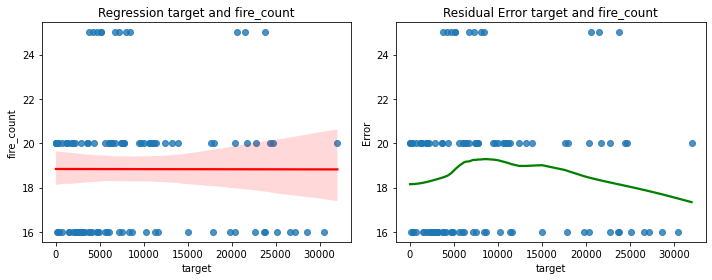

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_min
fire_min
Regression
slope:  -1.2852077107226684e-05
intersept:  1.4449026409986407
r2:  -0.03692808906812247
P_value:  0.7070520572467155
std error:  3.4103856790013525e-05


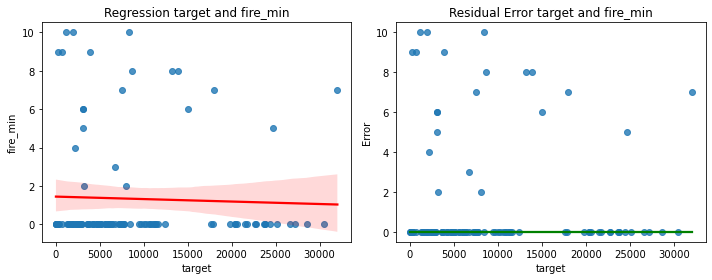

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_max
fire_max
Regression
slope:  2.787387338047889e-05
intersept:  2.0342246521562277
r2:  0.06747444443625117
P_value:  0.4919322493359035
std error:  4.041573212403168e-05


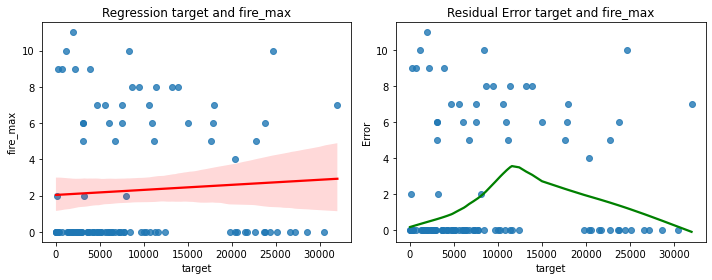

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_mean
fire_mean
Regression
slope:  1.8641799603130415e-05
intersept:  1.769504858790572
r2:  0.04866836235962924
P_value:  0.6203008327476514
std error:  3.7515391705921126e-05


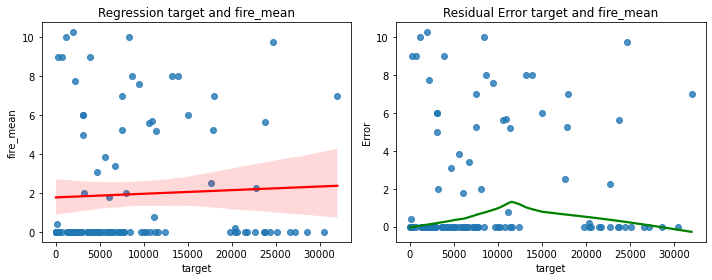

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_sum
fire_sum
Regression
slope:  0.00040533715326993193
intersept:  32.42924639633624
r2:  0.05666532393652013
P_value:  0.5639720832485214
std error:  0.0007002997880346495


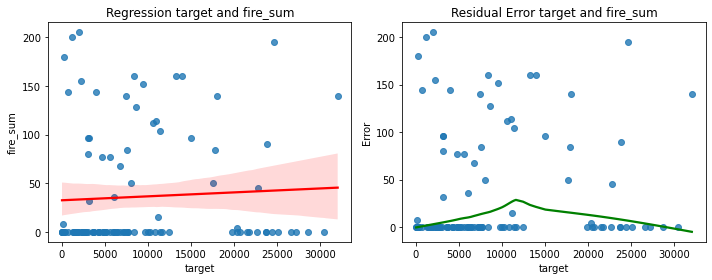

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_std
fire_std
Regression
slope:  1.1049506648787217e-05
intersept:  0.2572912878423746
r2:  0.10615907052929148
P_value:  0.27877329984780985
std error:  1.0148644076832843e-05


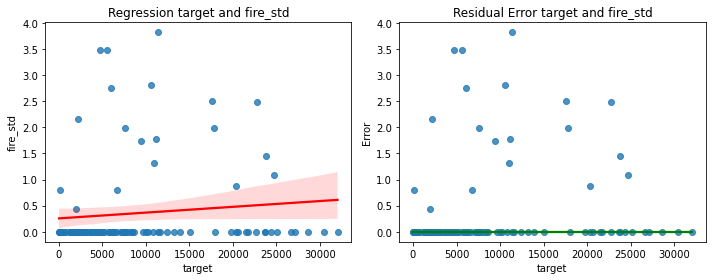

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_med
fire_med
Regression
slope:  1.8023837702991267e-05
intersept:  1.7966715532351434
r2:  0.0448030919888129
P_value:  0.6483641908781155
std error:  3.9408172007430346e-05


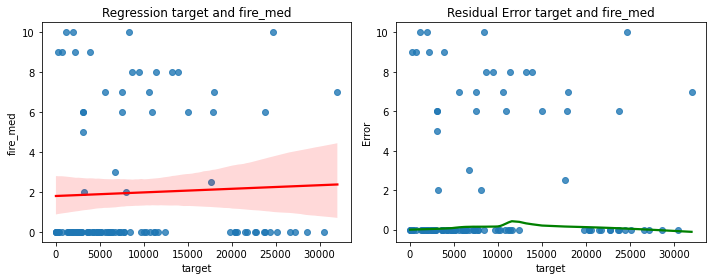

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_major
fire_major
Regression
slope:  1.5057890518275857e-05
intersept:  1.79955984323577
r2:  0.0373755224029987
P_value:  0.7036671377839351
std error:  3.947813633069781e-05


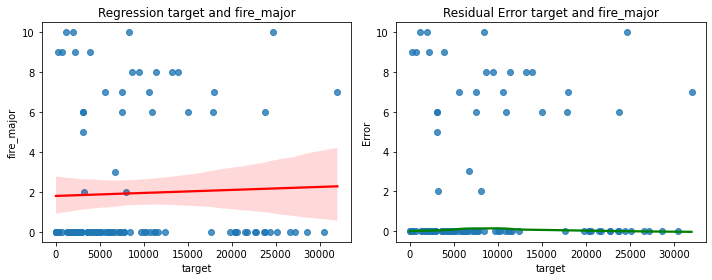

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_minor
fire_minor
Regression
slope:  -5.967988614454443e-06
intersept:  1.6853440299203515
r2:  -0.01627767083534924
P_value:  0.8684617139506096
std error:  3.594690556735108e-05


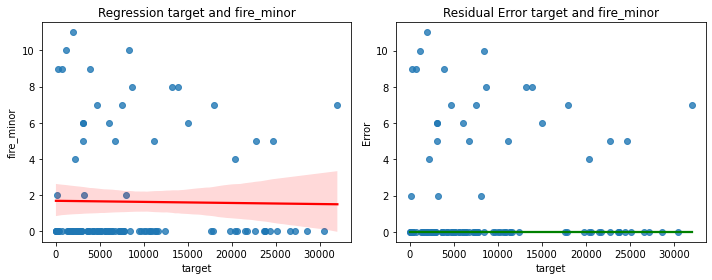

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
burnt_enco
burnt_enco
Regression
slope:  2.3288926804668477e-06
intersept:  0.25279787616733707
r2:  0.04338323774323159
P_value:  0.6588005577139455
std error:  5.2589829937058906e-06


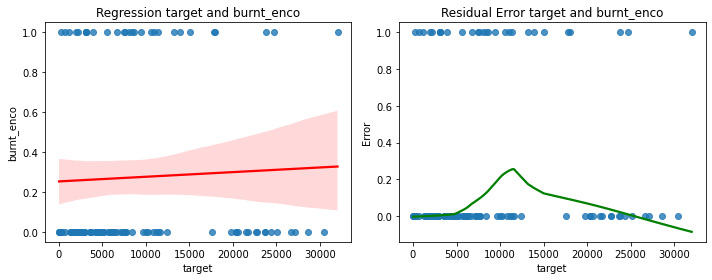

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_sn_ord
fire_sn_ord
Regression
slope:  4.079621362132738e-06
intersept:  0.4069826938009205
r2:  0.0442412052541894
P_value:  0.6524862407703085
std error:  9.033390870511086e-06


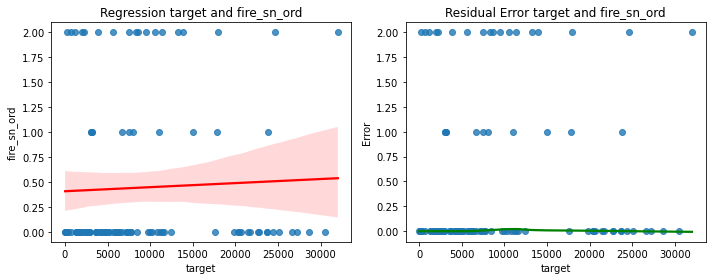

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_f
fire_f
Regression
slope:  -2.3145162588631685e-05
intersept:  0.9741426627238117
r2:  -0.21275161247647778
P_value:  0.028555267711746855
std error:  1.0423474929770309e-05


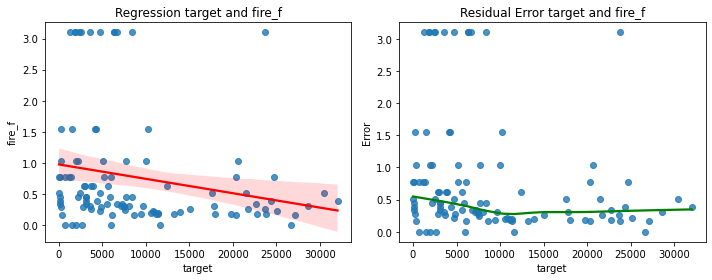

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_tot
fire_tot
Regression
slope:  0.0002313191704341238
intersept:  5.4919150661791845
r2:  0.33907685688777106
P_value:  0.00037718131425146294
std error:  6.293250799170596e-05


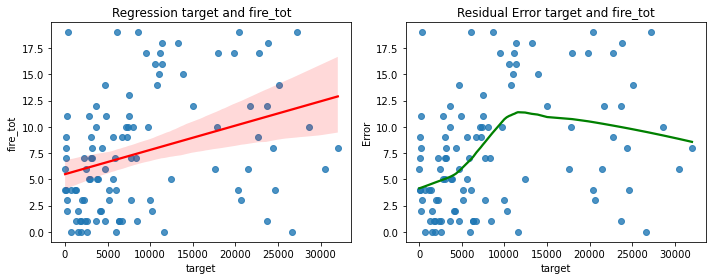

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
since_fire
since_fire
Regression
slope:  -0.00013817611712080486
intersept:  7.2050185860290705
r2:  -0.15522022785730558
P_value:  0.11210846842937937
std error:  8.623273164294412e-05


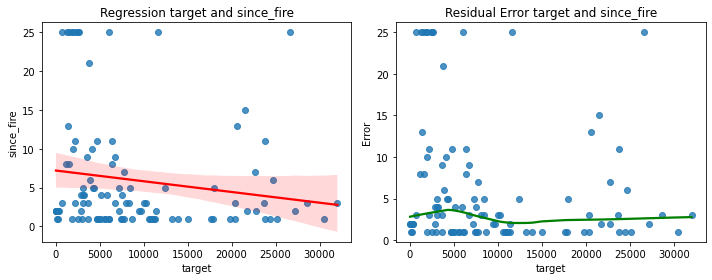

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_gap
fire_gap
Regression
slope:  -0.00012120693638812233
intersept:  6.229342699141206
r2:  -0.24552380906743376
P_value:  0.011186868323878316
std error:  4.69262638250442e-05


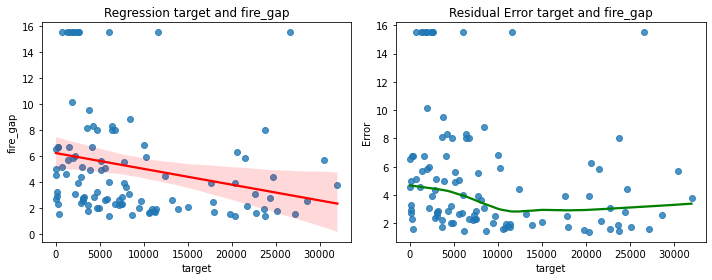

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_pois1_2
fire_pois1_2
Regression
slope:  0.00029556137819743334
intersept:  5.1774131673871615
r2:  0.3441653896700031
P_value:  0.00030338063153096236
std error:  7.906555785607677e-05


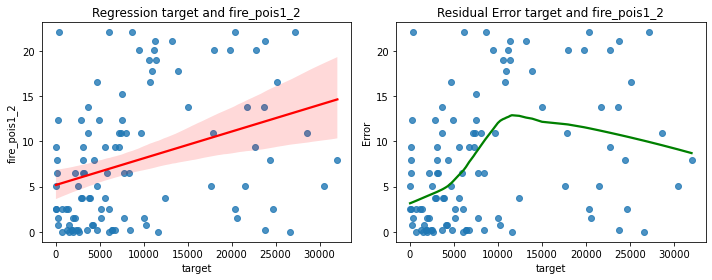

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_pois1_5
fire_pois1_5
Regression
slope:  0.00012386198738156059
intersept:  0.9927735409375578
r2:  0.3222505791769827
P_value:  0.0007550408743967078
std error:  3.5679530285576757e-05


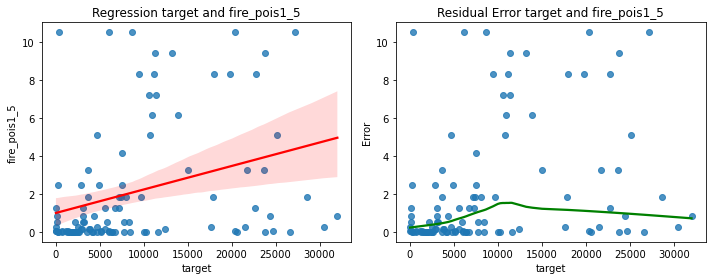

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
fire_pois1_10
fire_pois1_10
Regression
slope:  4.166749586095367e-05
intersept:  0.22104068815337047
r2:  0.28071890733854643
P_value:  0.0035596465206124426
std error:  1.3969642729352084e-05


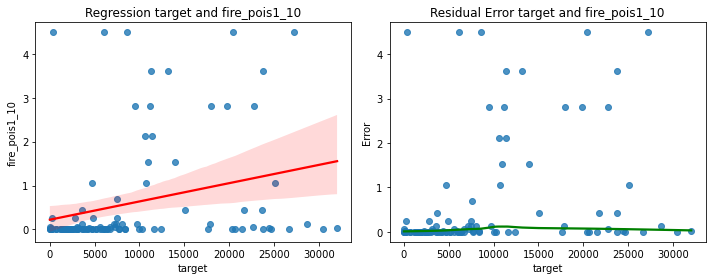

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_an_emsi_avg_si
tot_an_emsi_avg_si
Regression
slope:  -4.945304954112419e-05
intersept:  10.63557589394496
r2:  -0.40436071634378995
P_value:  1.71677839837876e-05
std error:  1.0968278099952823e-05


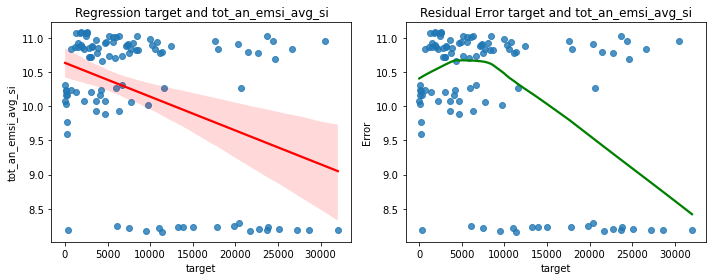

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_an_drsi_avg_si
tot_an_drsi_avg_si
Regression
slope:  -7.238906178745226e-05
intersept:  11.86390675775537
r2:  -0.5357207141768096
P_value:  3.270015939130223e-09
std error:  1.1188287406743194e-05


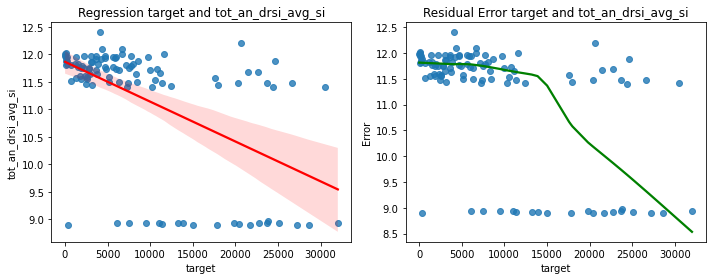

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_emse_djf
tot_avg_emse_djf
Regression
slope:  0.0037984307350041853
intersept:  335.3873321773882
r2:  0.47623440434258524
P_value:  2.4702989688225e-07
std error:  0.0006877220042265628


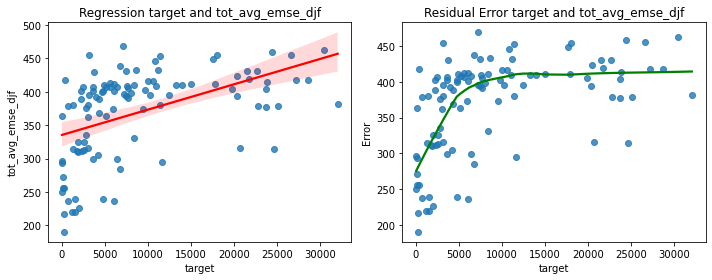

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_emse_mam
tot_avg_emse_mam
Regression
slope:  0.005566284008852148
intersept:  213.88581003649648
r2:  0.6144851743724635
P_value:  2.4505390651769096e-12
std error:  0.0007007689578877965


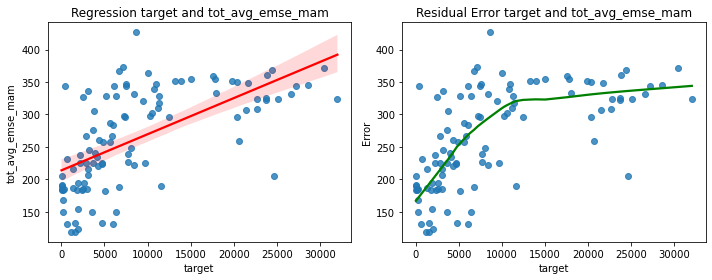

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_emse_jja
tot_avg_emse_jja
Regression
slope:  0.005471529546890748
intersept:  69.92448577175992
r2:  0.5945203622890403
P_value:  1.828796240598321e-11
std error:  0.0007256461661868866


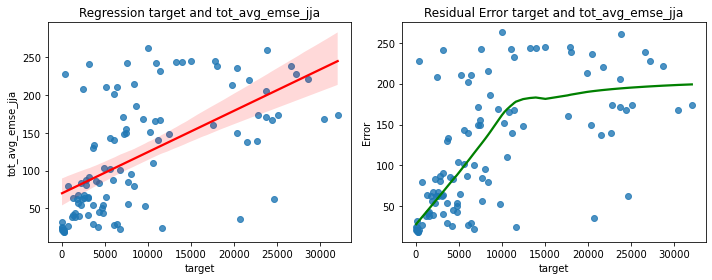

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_emse_son
tot_avg_emse_son
Regression
slope:  0.00043714687001965394
intersept:  216.16418989369464
r2:  0.031150488095161088
P_value:  0.7512525830464647
std error:  0.0013754190519775808


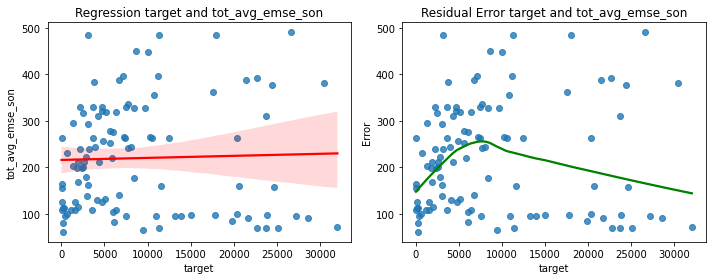

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_emse_dry
tot_avg_emse_dry
Regression
slope:  0.008954434362389886
intersept:  150.39414973305753
r2:  0.5806453559437843
P_value:  6.829306063106943e-11
std error:  0.0012311712888733468


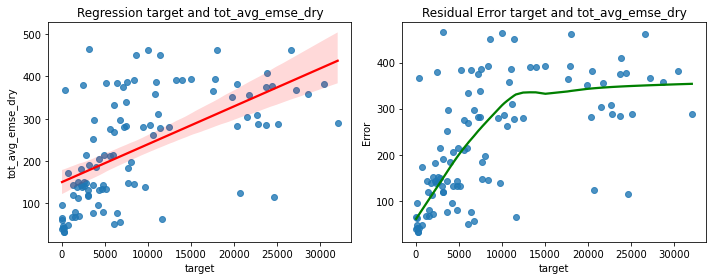

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_emse_wet
tot_avg_emse_wet
Regression
slope:  0.0030626061209092113
intersept:  684.8607524533398
r2:  0.13692646484204882
P_value:  0.16162392243330892
std error:  0.002172586960605189


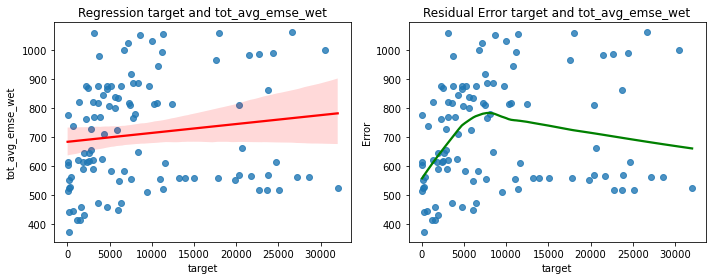

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_emse_annual
tot_avg_emse_annual
Regression
slope:  0.012017040483299098
intersept:  835.2549021863974
r2:  0.3643720079577948
P_value:  0.00012311664796974092
std error:  0.003011644851312787


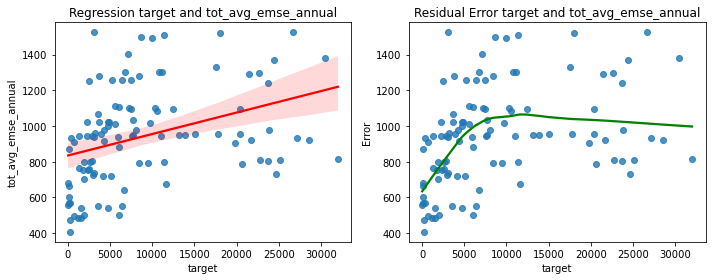

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_drse_djf
tot_avg_drse_djf
Regression
slope:  0.020926731142905587
intersept:  358.9630440455211
r2:  0.5576609232685786
P_value:  5.311573495919929e-10
std error:  0.0030544191063246007


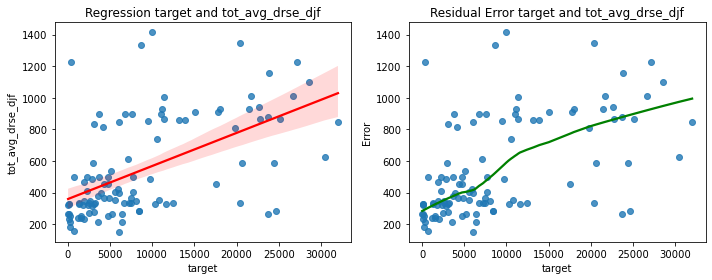

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_drse_mam
tot_avg_drse_mam
Regression
slope:  0.0036169762406985002
intersept:  240.25458456731187
r2:  0.23535068894241182
P_value:  0.015158494264967973
std error:  0.001464670026251211


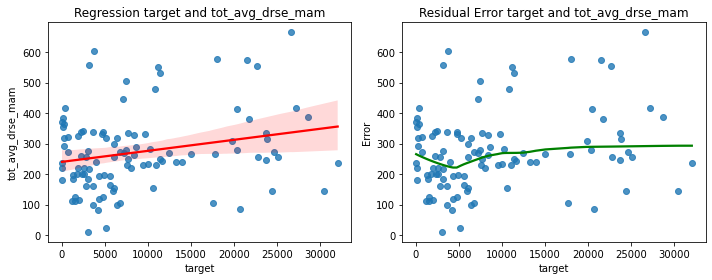

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_drse_jja
tot_avg_drse_jja
Regression
slope:  -1.0476873728865613e-05
intersept:  0.8340796139617539
r2:  -0.04257674632914292
P_value:  0.6647579783813019
std error:  2.4107300016185172e-05


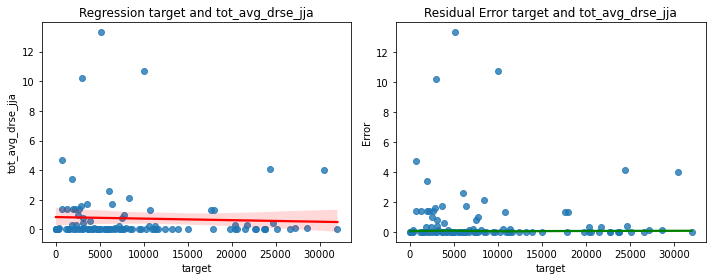

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_drse_son
tot_avg_drse_son
Regression
slope:  6.628133701704366e-05
intersept:  71.81358043599414
r2:  0.008970976878911945
P_value:  0.9272792004032852
std error:  0.0007244649467621824


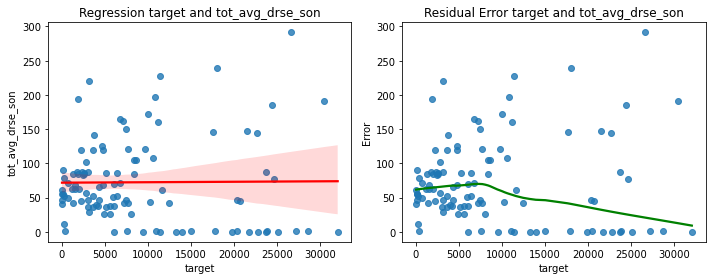

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_drse_dry
tot_avg_drse_dry
Regression
slope:  0.0006996794627686892
intersept:  11.562880244648944
r2:  0.19619981053172852
P_value:  0.04383284779152714
std error:  0.0003428939243231908


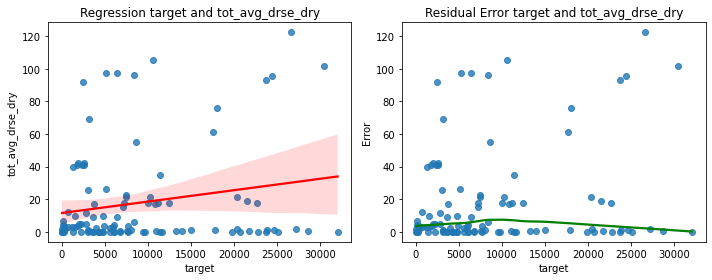

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_drse_wet
tot_avg_drse_wet
Regression
slope:  0.0138682011778881
intersept:  659.189518833251
r2:  0.3594836678844912
P_value:  0.00015398452347239834
std error:  0.003530013778080985


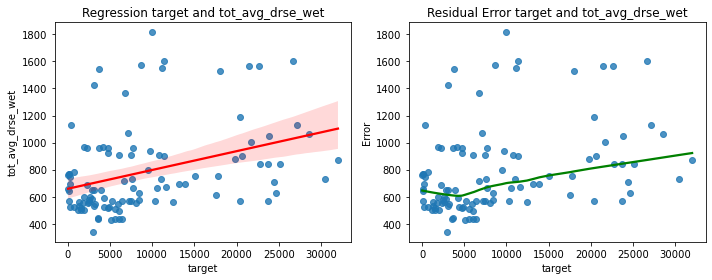

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tot_avg_drse_annual
tot_avg_drse_annual
Regression
slope:  0.014567880640656809
intersept:  670.7523990778996
r2:  0.3725413185023853
P_value:  8.402931568726676e-05
std error:  0.0035584472920265654


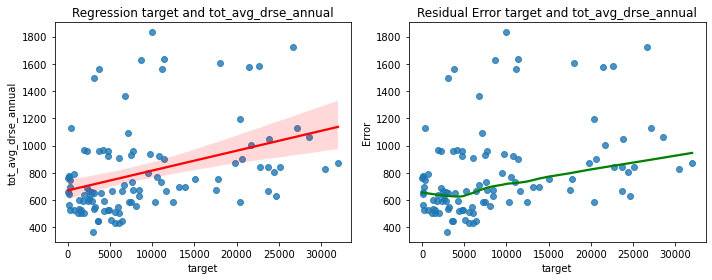

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
rain_d_mean
rain_d_mean
Regression
slope:  -4.685625362089482e-08
intersept:  0.0023050179615108496
r2:  -0.02859912465348326
P_value:  0.7710403702534832
std error:  1.6059072984261298e-07


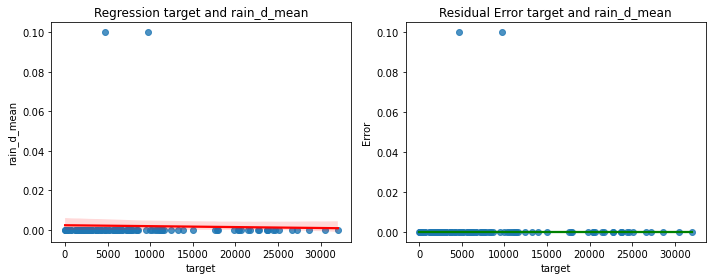

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
et_ma_mean
et_ma_mean
Regression
slope:  5.615447001731385e-05
intersept:  1.6563284429003173
r2:  0.28207917774772695
P_value:  0.003395266993587793
std error:  1.872804017522089e-05


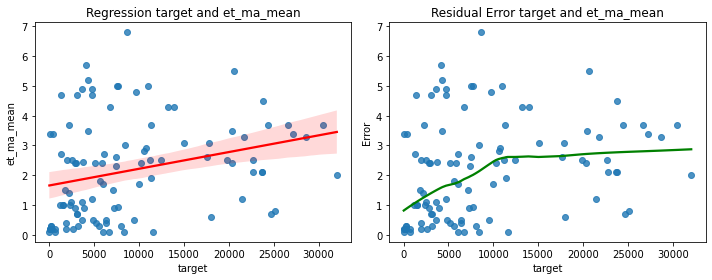

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tmax_mean
tmax_mean
Regression
slope:  2.1968914652588065e-05
intersept:  31.019477793462656
r2:  0.0435982721286772
P_value:  0.6572157109563925
std error:  4.936390478102977e-05


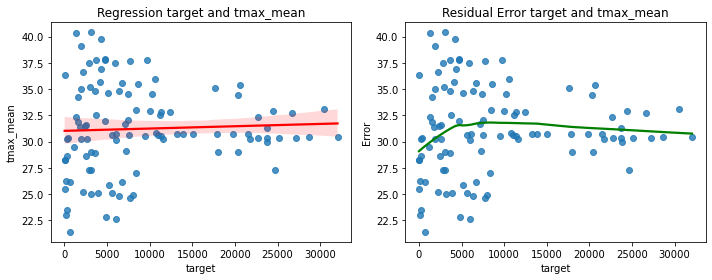

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
tmin_mean
tmin_mean
Regression
slope:  4.1571144014430886e-05
intersept:  15.260079942440743
r2:  0.06412715065090646
P_value:  0.513708697706402
std error:  6.343640297358948e-05


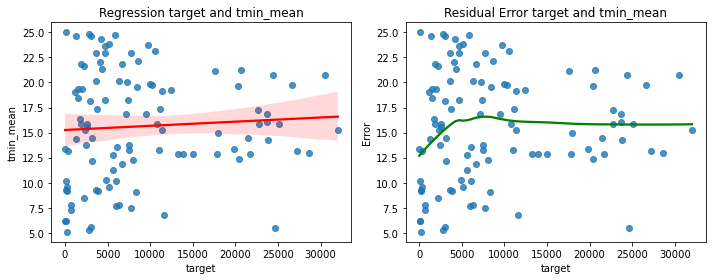

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
rh_tmax_mean
rh_tmax_mean
Regression
slope:  0.001270318361828694
intersept:  3306.46291698562
r2:  0.5894814968010748
P_value:  2.972425151744953e-11
std error:  0.0001706946207759023


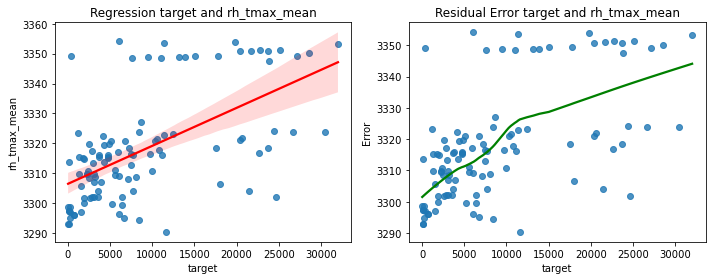

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
rh_tmin_mean
rh_tmin_mean
Regression
slope:  0.0008878720112994014
intersept:  3354.237372703723
r2:  0.44410971184801007
P_value:  1.8543529474900031e-06
std error:  0.0001756459188272835


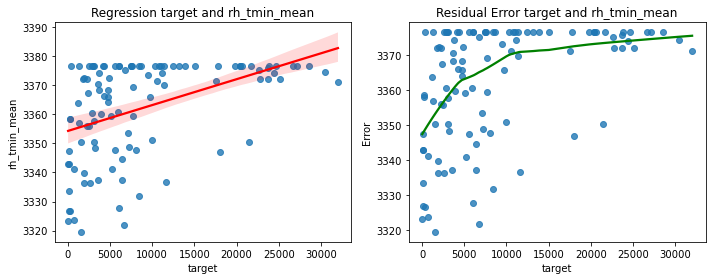

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_wfp_dry_mean
b1_wfp_dry_mean
Regression
slope:  0.0013756715154613188
intersept:  12.454260382902506
r2:  0.6287574067755899
P_value:  5.32813849693297e-13
std error:  0.0001668291979335557


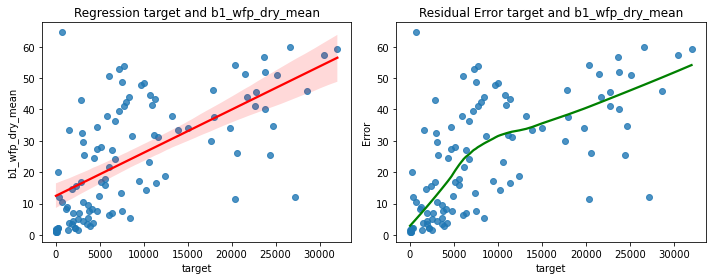

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_wfp_dry_p50
b1_wfp_dry_p50
Regression
slope:  0.0013992019166565433
intersept:  12.129048698082165
r2:  0.6247651932293868
P_value:  8.229106394852005e-13
std error:  0.00017147221473446693


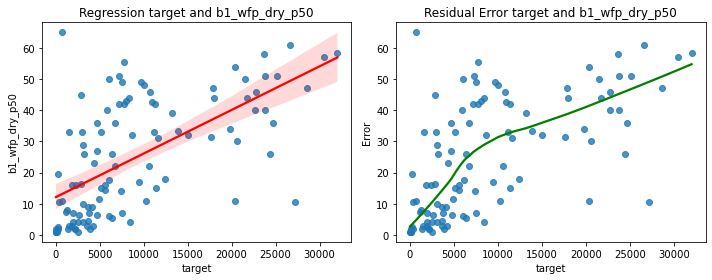

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_wfp_dry_p99
b1_wfp_dry_p99
Regression
slope:  0.001456942675713653
intersept:  18.64952026583142
r2:  0.6233699748969073
P_value:  9.565184797173496e-13
std error:  0.00017920335607736926


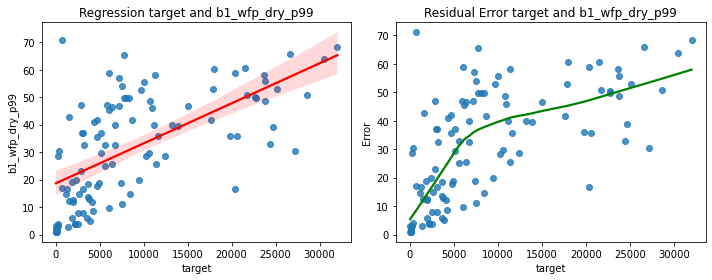

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_wdc_dry_major
b1_wdc_dry_major
Regression
slope:  6.124946578681412e-05
intersept:  1.5570783840395377
r2:  0.5934897585464298
P_value:  2.0211907769544254e-11
std error:  8.14484437416787e-06


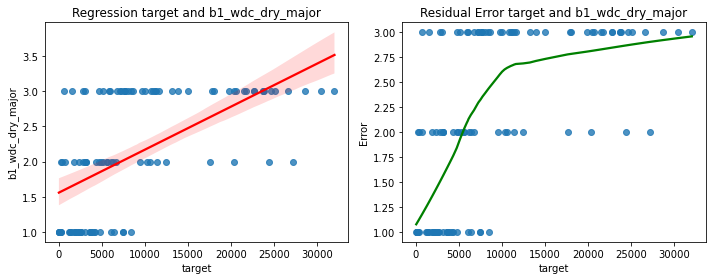

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_n17_dry_major
b1_n17_dry_major
Regression
slope:  -2.221511296773513e-05
intersept:  4.594512155061955
r2:  -0.06769026000531181
P_value:  0.4905451712643478
std error:  3.210764298456573e-05


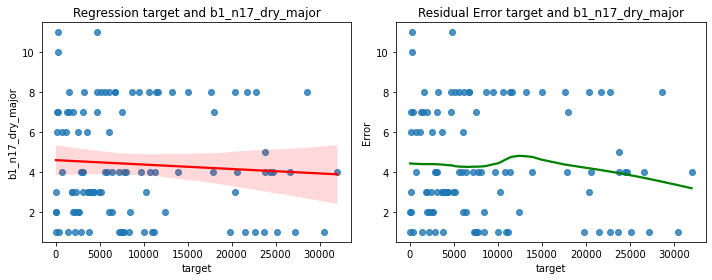

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_hsd_mean
b1_hsd_mean
Regression
slope:  9.382830443424573e-05
intersept:  102.04581585249497
r2:  0.6560909832075004
P_value:  2.278211399443281e-14
std error:  1.0583200086793822e-05


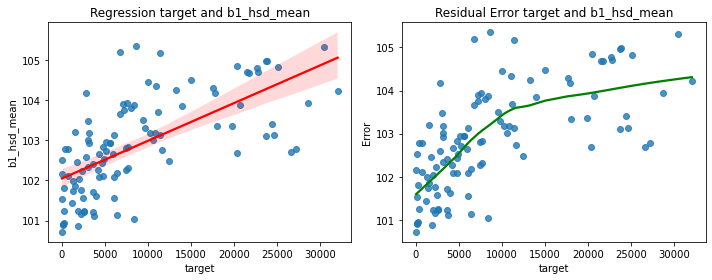

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_hsd_p50
b1_hsd_p50
Regression
slope:  9.226073077138827e-05
intersept:  102.04502483426515
r2:  0.6435675125564235
P_value:  1.0044758085032764e-13
std error:  1.0759411624441714e-05


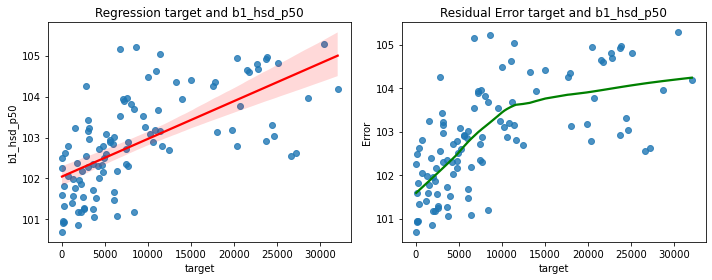

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_hsd_p99
b1_hsd_p99
Regression
slope:  0.00010278647931827373
intersept:  102.56921680408173
r2:  0.6483599493763776
P_value:  5.739889521467716e-14
std error:  1.1835274502447593e-05


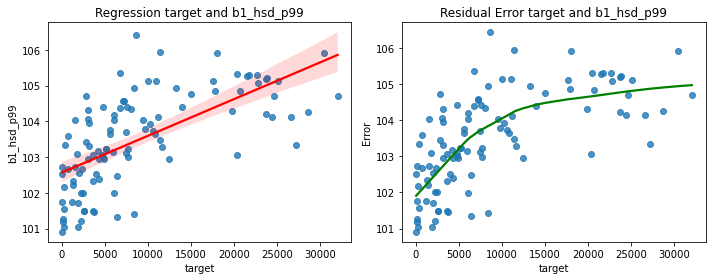

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_hmc_mean
b1_hmc_mean
Regression
slope:  0.00020996381696491707
intersept:  103.52380902101774
r2:  0.6603263518657758
P_value:  1.3575242465548436e-14
std error:  2.3415143231059932e-05


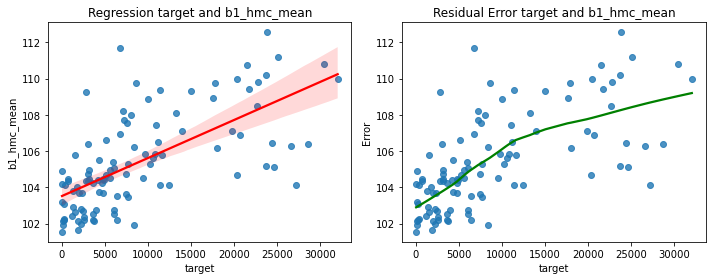

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_hmc_p50
b1_hmc_p50
Regression
slope:  0.0002087983423688491
intersept:  103.51870514670037
r2:  0.654111995003669
P_value:  2.893541596697687e-14
std error:  2.3676007553647013e-05


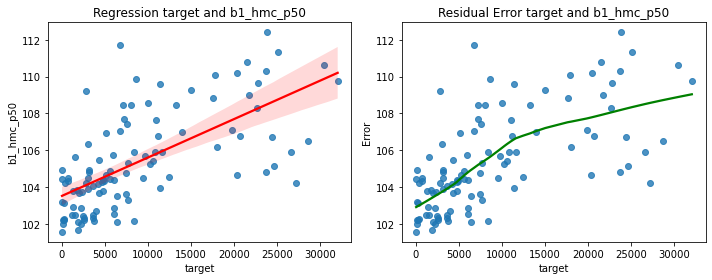

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_hmc_p99
b1_hmc_p99
Regression
slope:  0.00024859398664267205
intersept:  104.41931193315384
r2:  0.667238593426359
P_value:  5.727017854137296e-15
std error:  2.7211854763851307e-05


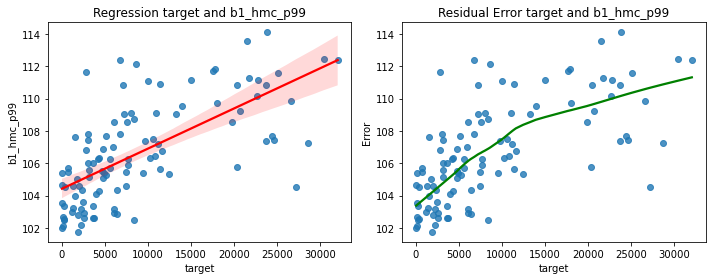

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_hcv_mean
b1_hcv_mean
Regression
slope:  5.952280806624012e-05
intersept:  153.81593793193457
r2:  0.05256532353653337
P_value:  0.5925486002080208
std error:  0.0001108834084020008


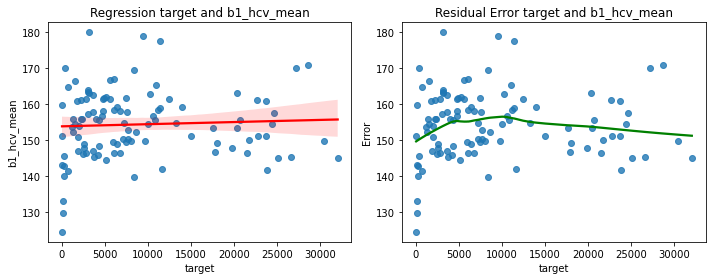

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_hcv_p50
b1_hcv_p50
Regression
slope:  4.6676166880432967e-05
intersept:  153.79888710062428
r2:  0.04151626920738897
P_value:  0.6726233684084524
std error:  0.00011015027780184694


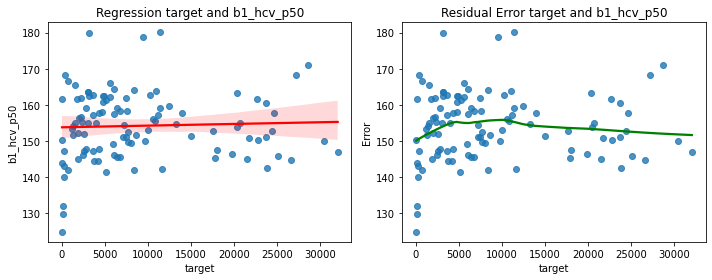

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_hcv_p99
b1_hcv_p99
Regression
slope:  7.073200320649551e-05
intersept:  161.63121670496076
r2:  0.04879775104971997
P_value:  0.6193704866135077
std error:  0.00014196516422219268


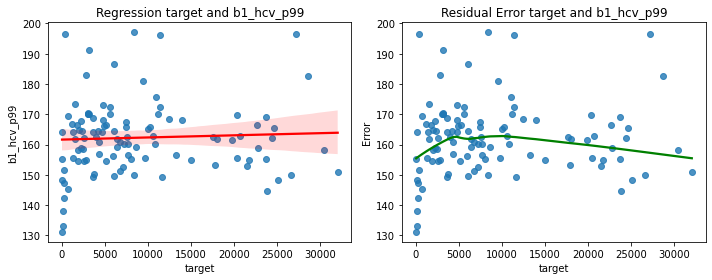

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_h99_mean
b1_h99_mean
Regression
slope:  0.00033995106968963596
intersept:  108.00879325987572
r2:  0.6558430237621481
P_value:  2.3477216572439242e-14
std error:  3.836963864389136e-05


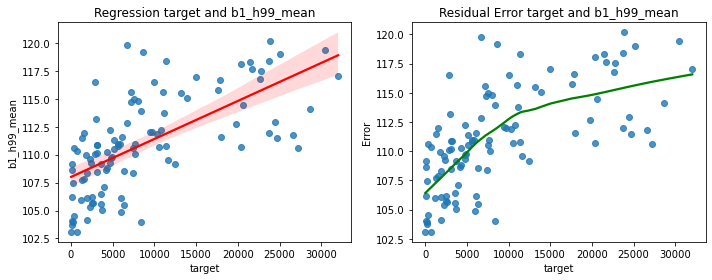

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_h99_p50
b1_h99_p50
Regression
slope:  0.0003367688254519743
intersept:  108.06258045451929
r2:  0.6464562763626348
P_value:  7.17727572670246e-14
std error:  3.897379739278583e-05


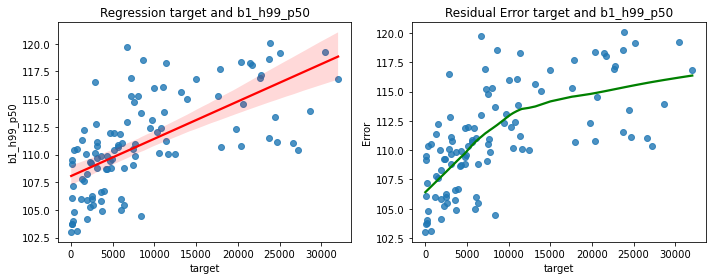

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_h99_p99
b1_h99_p99
Regression
slope:  0.00036791805265784625
intersept:  109.76935058306759
r2:  0.6466034093672939
P_value:  7.054766704747477e-14
std error:  4.2562009164282604e-05


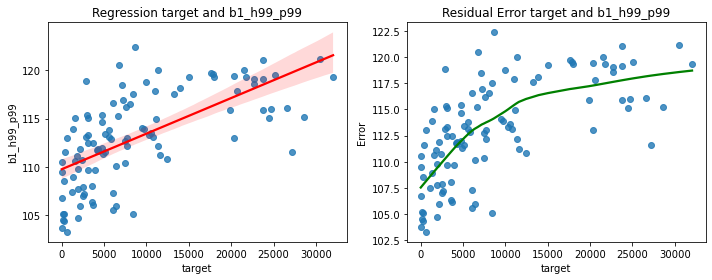

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_fdc_dry_major
b1_fdc_dry_major
Regression
slope:  5.0348728738668524e-05
intersept:  1.8807903372753187
r2:  0.578132668251307
P_value:  8.612817046562601e-11
std error:  6.967934063943923e-06


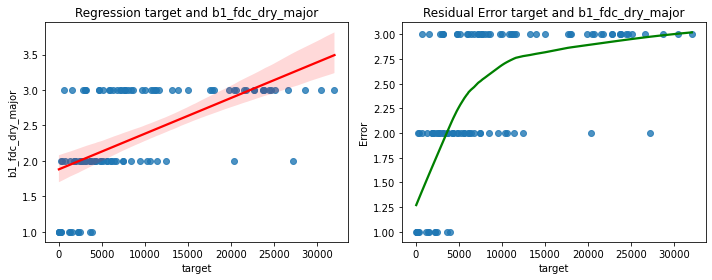

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_ccw_dry_mean
b1_ccw_dry_mean
Regression
slope:  0.0019556683582294485
intersept:  20.65288557637693
r2:  0.6291197458408381
P_value:  5.120441592191973e-13
std error:  0.00023694010843760822


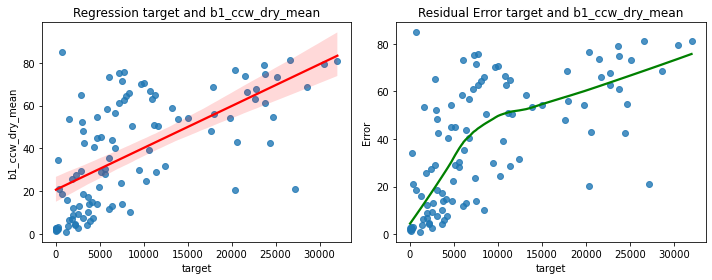

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_ccw_dry_p50
b1_ccw_dry_p50
Regression
slope:  0.002002840972417502
intersept:  20.146799636548565
r2:  0.6268831085016594
P_value:  6.539447619143359e-13
std error:  0.00024408655622638512


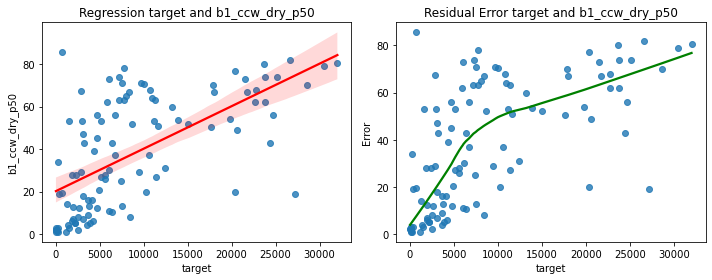

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_ccw_dry_p99
b1_ccw_dry_p99
Regression
slope:  0.0019481794647092548
intersept:  30.08506996769325
r2:  0.6180313359542063
P_value:  1.6894028018580598e-12
std error:  0.00024300159708811312


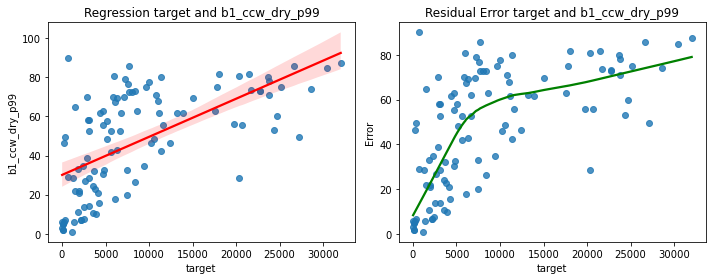

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_dbifm_dry_mean
b1_dbifm_dry_mean
Regression
slope:  -0.008856701342014705
intersept:  478.9960990633064
r2:  -0.5970533347961237
P_value:  1.42803473472954e-11
std error:  0.0011668786530409185


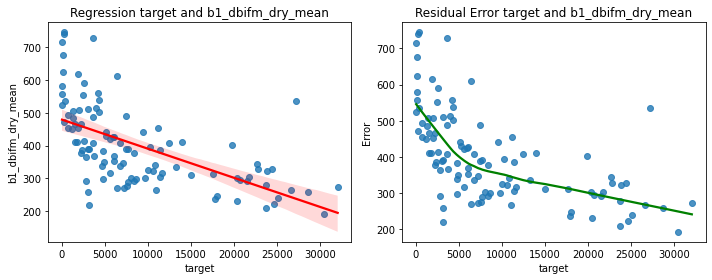

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_dp1fm_dry_mean
b1_dp1fm_dry_mean
Regression
slope:  -0.00029239148025141435
intersept:  13.284557744566825
r2:  -0.2559793461333209
P_value:  0.008084962461262977
std error:  0.00010827466871051406


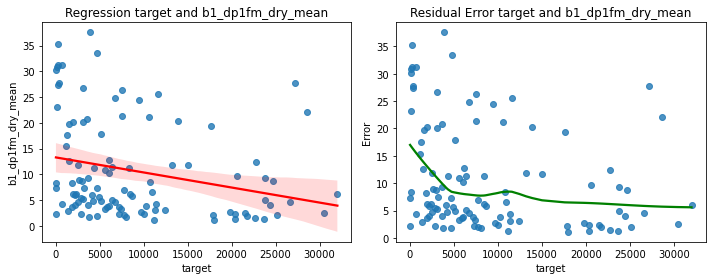

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_dp1fm_dry_p50
b1_dp1fm_dry_p50
Regression
slope:  -0.00029861489116809326
intersept:  13.325728407869041
r2:  -0.25394965216715165
P_value:  0.008619675209946937
std error:  0.00011152475744826859


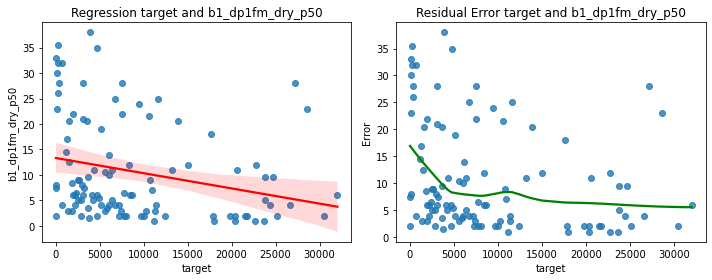

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_dp1fm_dry_p99
b1_dp1fm_dry_p99
Regression
slope:  -0.0003747449204178776
intersept:  17.70863948552411
r2:  -0.28165836578294395
P_value:  0.003445376479825576
std error:  0.00012518378758614277


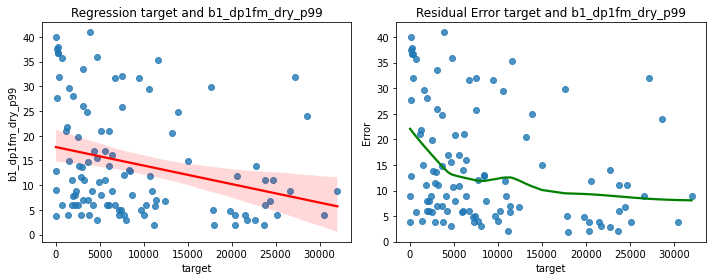

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b2_dp1fm_dry_mean
b2_dp1fm_dry_mean
Regression
slope:  0.0011693177631992876
intersept:  17.4227446908038
r2:  0.6325181171886438
P_value:  3.517606456069445e-13
std error:  0.00014040736180687843


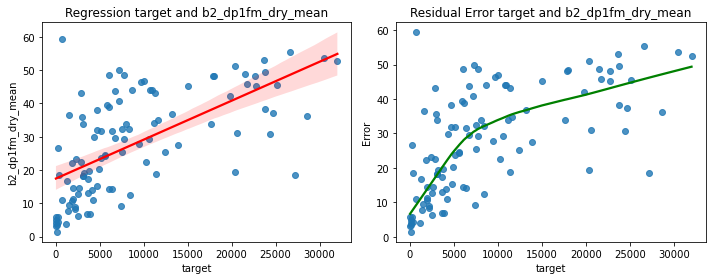

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b2_dp1fm_dry_p50
b2_dp1fm_dry_p50
Regression
slope:  0.0011830781060454462
intersept:  17.275089104980275
r2:  0.6315832324126188
P_value:  3.90215486849206e-13
std error:  0.00014240999355764498


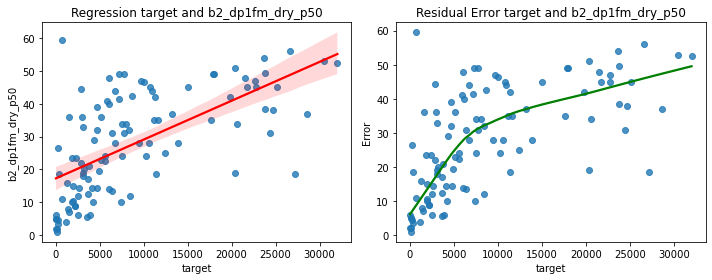

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b2_dp1fm_dry_p95
b2_dp1fm_dry_p95
Regression
slope:  0.0011211091186942802
intersept:  22.62537636070998
r2:  0.6048129451294438
P_value:  6.602825853964304e-12
std error:  0.0001447517096158131


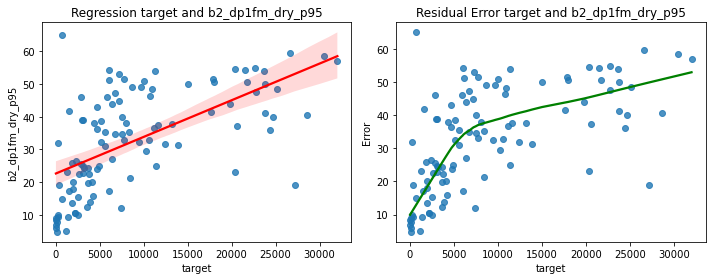

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b3_dp1fm_dry_mean
b3_dp1fm_dry_mean
Regression
slope:  -0.0008785930143815628
intersept:  67.82891161627175
r2:  -0.5026157426556558
P_value:  4.0163815546880376e-08
std error:  0.0001481852489169535


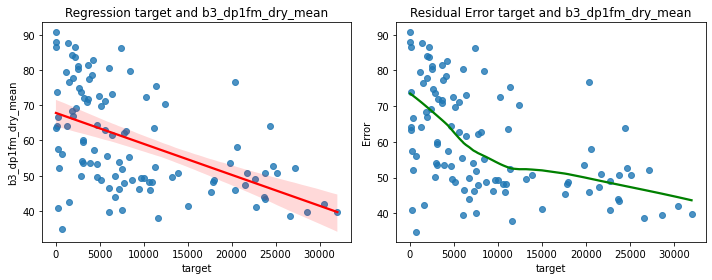

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b3_dp1fm_dry_p50
b3_dp1fm_dry_p50
Regression
slope:  -0.000887051646766944
intersept:  67.86096533462239
r2:  -0.4987842174787738
P_value:  5.2793307104621424e-08
std error:  0.00015114767052652205


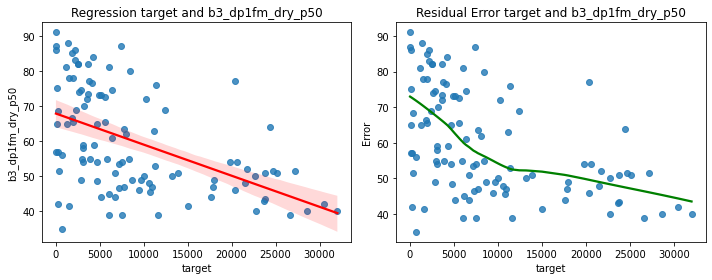

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b3_dp1fm_dry_p99
b3_dp1fm_dry_p99
Regression
slope:  -0.0009445591650937054
intersept:  74.38511004007948
r2:  -0.5372336218606031
P_value:  2.896835978995897e-09
std error:  0.00014541196681630133


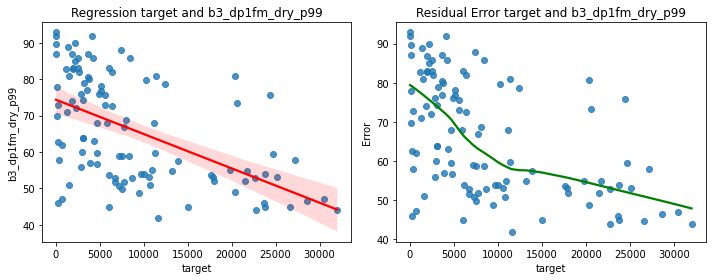

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_dbifm_dry_p50
b1_dbifm_dry_p50
Regression
slope:  -0.008768363164188876
intersept:  476.4808810654742
r2:  -0.5890421625195399
P_value:  3.099782120192608e-11
std error:  0.001179564847124324


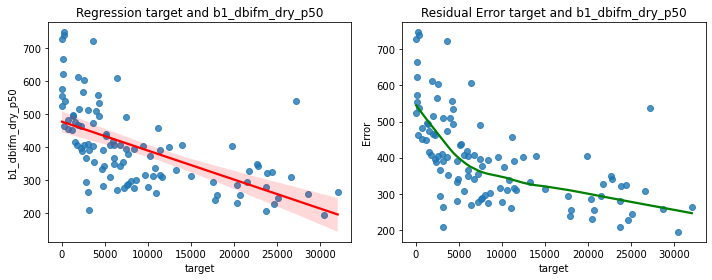

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b1_dbifm_dry_p99
b1_dbifm_dry_p99
Regression
slope:  -0.009262913496299494
intersept:  541.4015108746437
r2:  -0.5991143812968718
P_value:  1.1658220880137261e-11
std error:  0.0012138672571365345


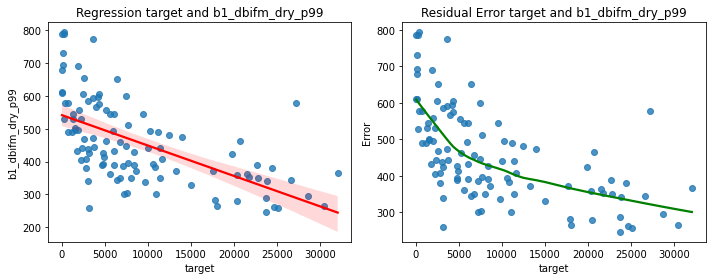

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b2_dbifm_dry_mean
b2_dbifm_dry_mean
Regression
slope:  -0.01330039919323947
intersept:  788.0972328164196
r2:  -0.6102757952884039
P_value:  3.787887283815187e-12
std error:  0.0016929755385513168


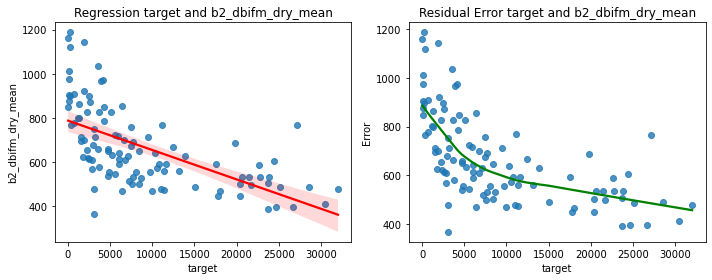

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b2_dbifm_dry_p50
b2_dbifm_dry_p50
Regression
slope:  -0.01345315789272947
intersept:  788.2299802003769
r2:  -0.6122583157646643
P_value:  3.0879289574641345e-12
std error:  0.0017035756984141593


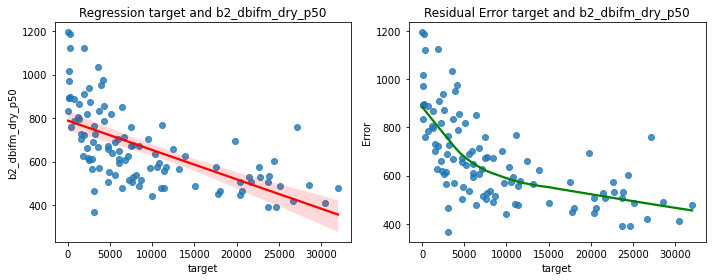

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b2_dbifm_dry_p99
b2_dbifm_dry_p99
Regression
slope:  -0.014087294025105604
intersept:  865.772739325734
r2:  -0.6114915008041958
P_value:  3.3424133930330136e-12
std error:  0.001787453514392054


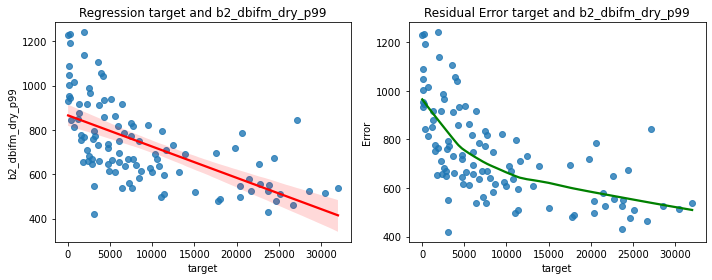

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b3_dbifm_dry_mean
b3_dbifm_dry_mean
Regression
slope:  -0.021182427156577754
intersept:  1121.7742687403475
r2:  -0.6139013217704976
P_value:  2.604131222180881e-12
std error:  0.002670841584986456


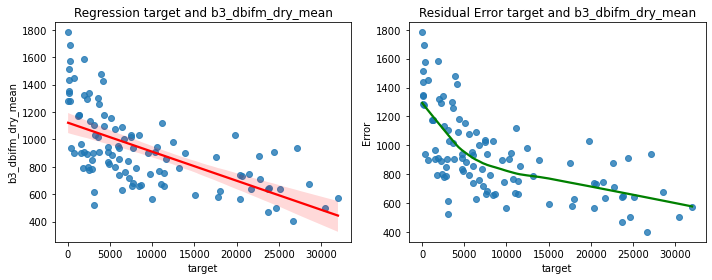

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b3_dbifm_dry_p50
b3_dbifm_dry_p50
Regression
slope:  -0.021372735512646013
intersept:  1122.0499387756563
r2:  -0.6160368967420624
P_value:  2.0836722175413437e-12
std error:  0.0026798291071396894


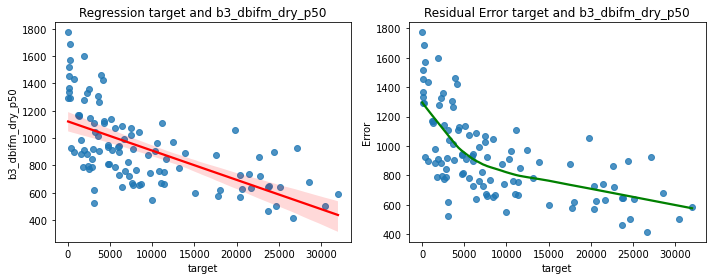

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b3_dbifm_dry_p99
b3_dbifm_dry_p99
Regression
slope:  -0.022074978997114025
intersept:  1233.6138121793526
r2:  -0.606276848356018
P_value:  5.695209832356987e-12
std error:  0.002839346019240489


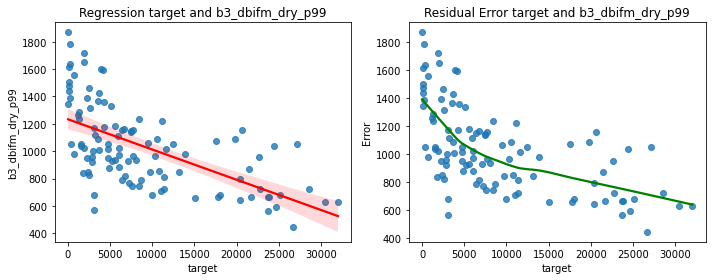

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b4_dbifm_dry_mean
b4_dbifm_dry_mean
Regression
slope:  -0.0016379167535326773
intersept:  2084.211866979131
r2:  -0.043210846449666725
P_value:  0.6600722082730517
std error:  0.003713441190305219


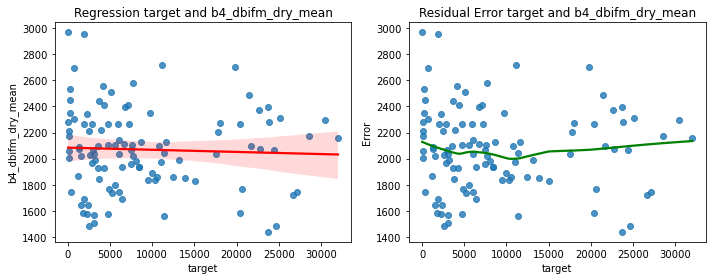

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b4_dbifm_dry_p50
b4_dbifm_dry_p50
Regression
slope:  -0.0021782766377916774
intersept:  2084.937956824129
r2:  -0.05706870528950472
P_value:  0.5611962999864455
std error:  0.003736715012064128


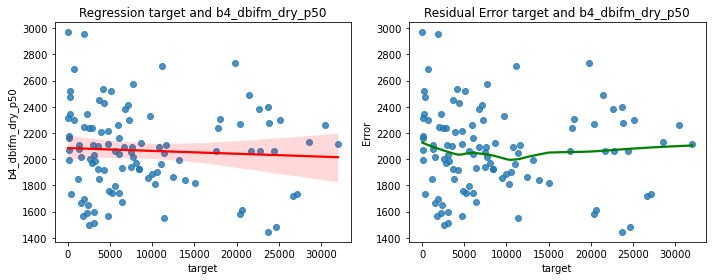

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b4_dbifm_dry_p99
b4_dbifm_dry_p99
Regression
slope:  -0.00047437188999245583
intersept:  2196.7537303574413
r2:  -0.011830851053964456
P_value:  0.9041932066759794
std error:  0.00393147839631


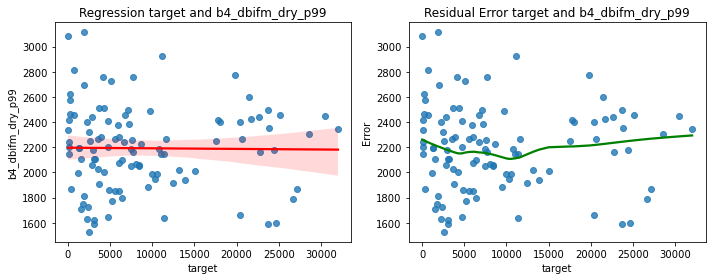

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b5_dbifm_dry_mean
b5_dbifm_dry_mean
Regression
slope:  -0.03266800769552551
intersept:  2681.971197474295
r2:  -0.605102087363985
P_value:  6.413149733605428e-12
std error:  0.00421474279895334


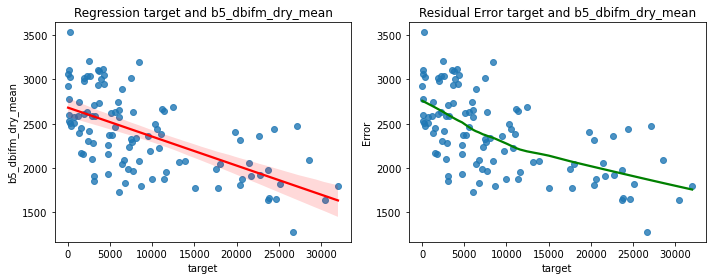

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b5_dbifm_dry_p50
b5_dbifm_dry_p50
Regression
slope:  -0.03287536459010403
intersept:  2677.3134532753006
r2:  -0.602550168296531
P_value:  8.286178670599703e-12
std error:  0.004269801366842569


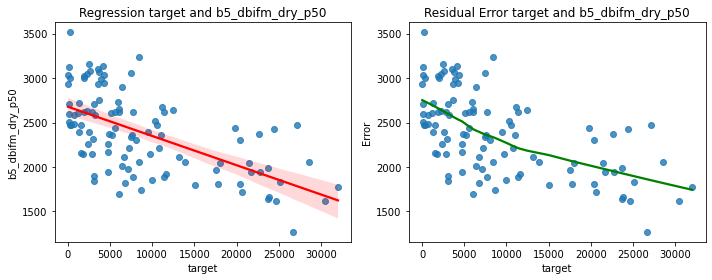

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b5_dbifm_dry_p99
b5_dbifm_dry_p99
Regression
slope:  -0.03257355551270814
intersept:  2864.1336484376634
r2:  -0.5872623869996463
P_value:  3.6716703037996684e-11
std error:  0.004402280355314223


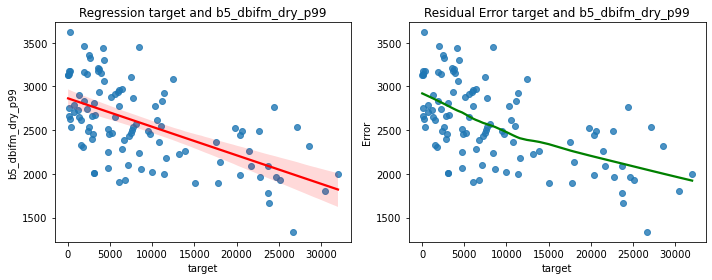

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b6_dbifm_dry_mean
b6_dbifm_dry_mean
Regression
slope:  -0.031206701410256617
intersept:  1785.9341124318812
r2:  -0.5993931551419569
P_value:  1.1341406091794947e-11
std error:  0.004086544345387166


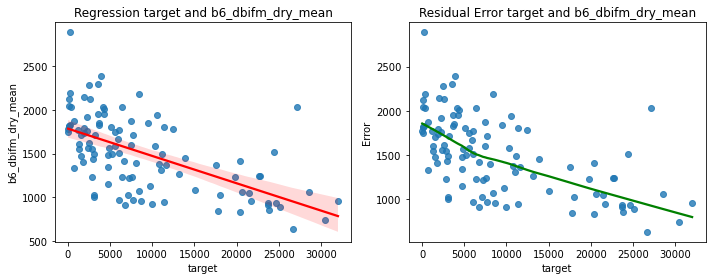

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b6_dbifm_dry_p50
b6_dbifm_dry_p50
Regression
slope:  -0.031646088971078325
intersept:  1789.7988381114485
r2:  -0.599969836505837
P_value:  1.0712189651032333e-11
std error:  0.004137864126108757


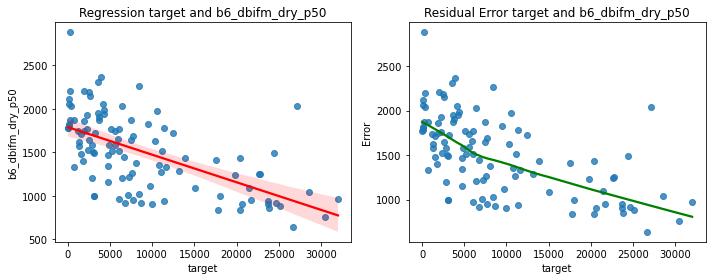

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
b6_dbifm_dry_p99
b6_dbifm_dry_p99
Regression
slope:  -0.032325680804344434
intersept:  1960.8312840768258
r2:  -0.5944730384197692
P_value:  1.8372298259276304e-11
std error:  0.004287630038943241


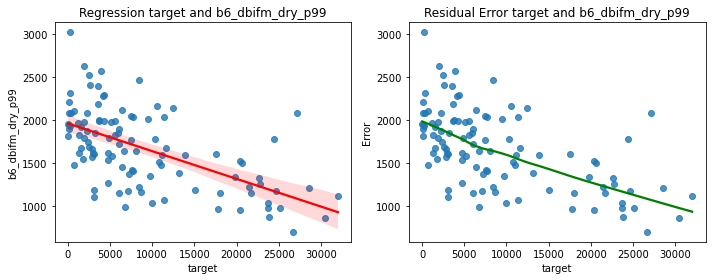

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_r32
dbifmdry_r32
Regression
slope:  -47.59496458781828
intersept:  14250574.974734697
r2:  -0.3498307240354361
P_value:  0.00023702985940361548
std error:  12.497963886759578


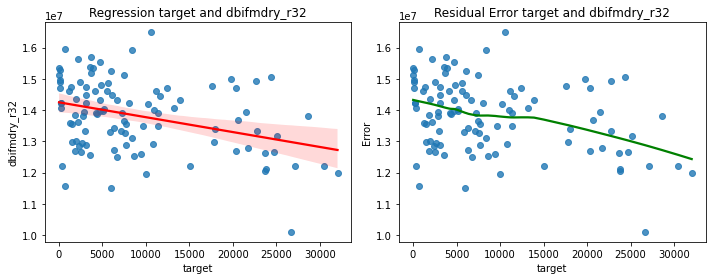

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_r42
dbifmdry_r42
Regression
slope:  656.434792785489
intersept:  26725548.65940711
r2:  0.6772331930024246
P_value:  1.5776503034987739e-15
std error:  69.93230508032279


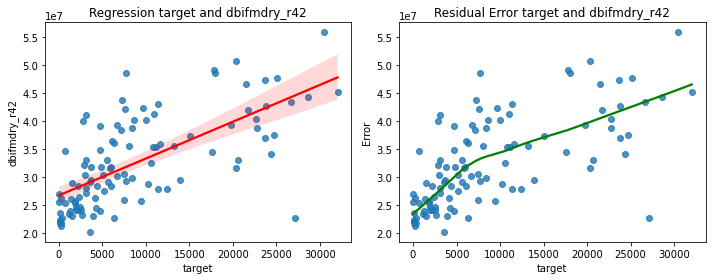

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_r43
dbifmdry_r43
Regression
slope:  585.1802968179801
intersept:  18675466.90547261
r2:  0.6915744698736037
P_value:  2.2653401753761444e-16
std error:  59.93145115264998


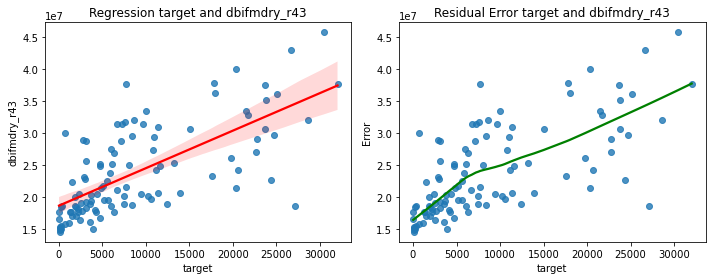

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_r52
dbifmdry_r52
Regression
slope:  186.63504102231894
intersept:  35094262.20266469
r2:  0.2667830604110521
P_value:  0.0057023663809069374
std error:  66.11281286609157


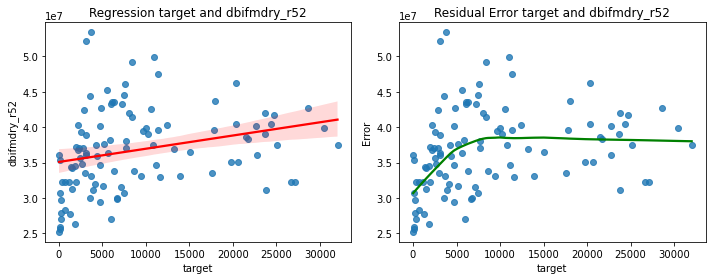

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_r53
dbifmdry_r53
Regression
slope:  232.69244608526694
intersept:  24648116.100774355
r2:  0.439414950626391
P_value:  2.448035018726011e-06
std error:  46.64494080122463


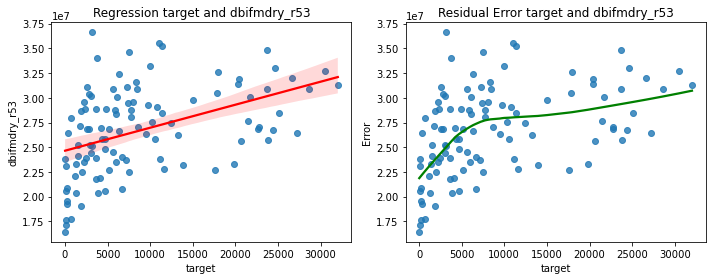

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_r54
dbifmdry_r54
Regression
slope:  -148.2549238888542
intersept:  13064655.913515834
r2:  -0.49830457725402716
P_value:  5.461868886734151e-08
std error:  25.294010970352055


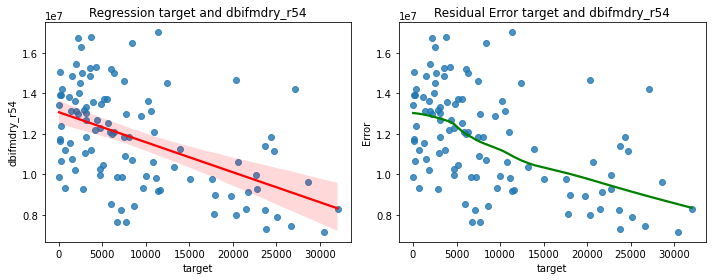

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_r62
dbifmdry_r62
Regression
slope:  -65.58791689562025
intersept:  23238969.360509623
r2:  -0.1390147462543474
P_value:  0.15526302207646414
std error:  45.81511982367266


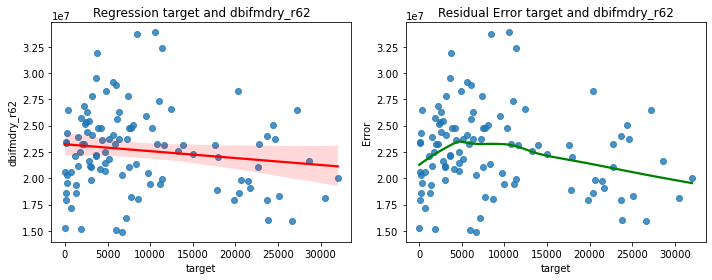

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_r63
dbifmdry_r63
Regression
slope:  6.056494561665922
intersept:  16350428.991326902
r2:  0.019395106992037916
P_value:  0.843564805190866
std error:  30.61475459720222


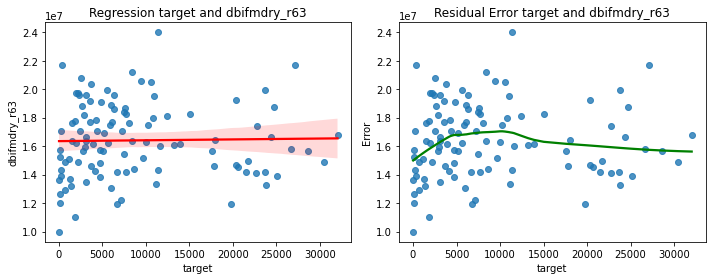

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_r64
dbifmdry_r64
Regression
slope:  -142.25641291093842
intersept:  8705965.70443228
r2:  -0.5126462128104984
P_value:  1.931887085795066e-08
std error:  23.36298258776215


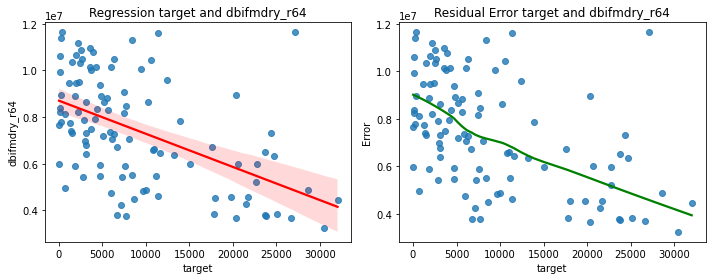

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_r65
dbifmdry_r65
Regression
slope:  -50.4822557043531
intersept:  6662135.212617551
r2:  -0.47123330648899703
P_value:  3.427467458457318e-07
std error:  9.26528801227505


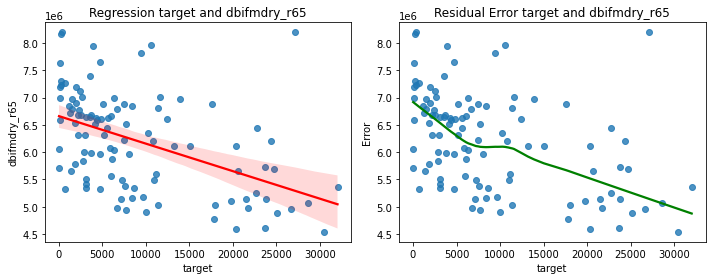

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_GSAVI
dbifmdry_GSAVI
Regression
slope:  27.660590186580084
intersept:  2458841.3946351632
r2:  0.4729160548017103
P_value:  3.07164193996539e-07
std error:  5.053469009277675


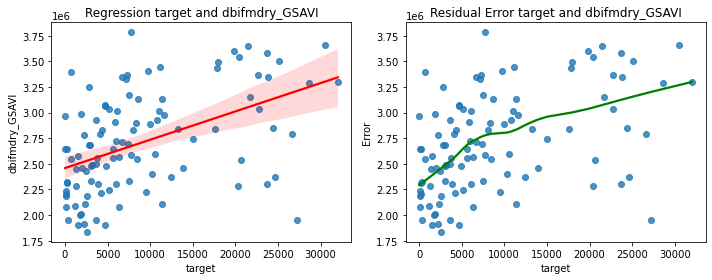

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_GNDVI
dbifmdry_GNDVI
Regression
slope:  68.56231895265611
intersept:  4531580.440323135
r2:  0.6543095229146031
P_value:  2.8255322300165765e-14
std error:  7.770298096039744


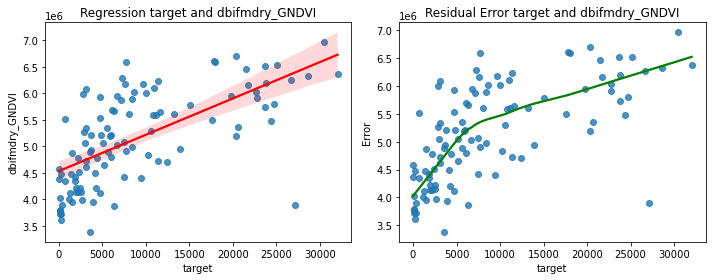

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_CVI
dbifmdry_CVI
Regression
slope:  721.439022655207
intersept:  38340813.405247375
r2:  0.5870284194239692
P_value:  3.754023839045347e-11
std error:  97.5610055472259


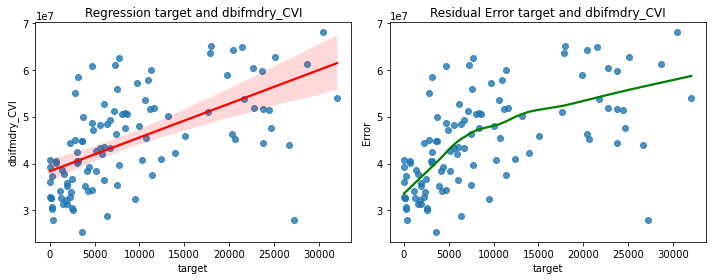

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_NDGI
dbifmdry_NDGI
Regression
slope:  17.548525257302895
intersept:  -1743912.5382576103
r2:  0.35761548123103826
P_value:  0.00016757087014096194
std error:  4.493591280264949


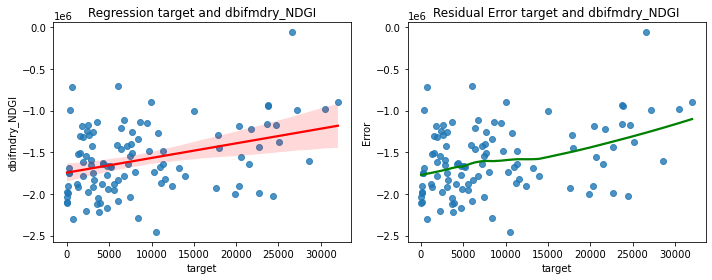

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_RI
dbifmdry_RI
Regression
slope:  -17.548525257302895
intersept:  1743912.5382576103
r2:  -0.35761548123103826
P_value:  0.00016757087014096194
std error:  4.493591280264949


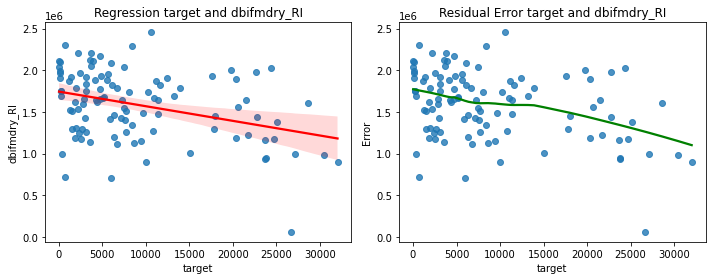

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_NBR
dbifmdry_NBR
Regression
slope:  103.8130651184972
intersept:  750547.5958872667
r2:  0.5477875478602957
P_value:  1.2231473729979082e-09
std error:  15.54712610345357


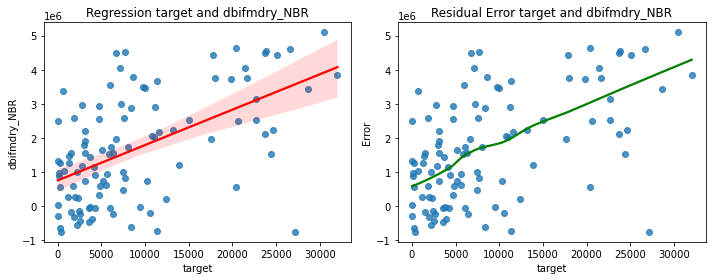

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_NDII
dbifmdry_NDII
Regression
slope:  68.06562558533597
intersept:  -1287762.5753336984
r2:  0.5274857799088316
P_value:  6.258928614597359e-09
std error:  10.74970246638615


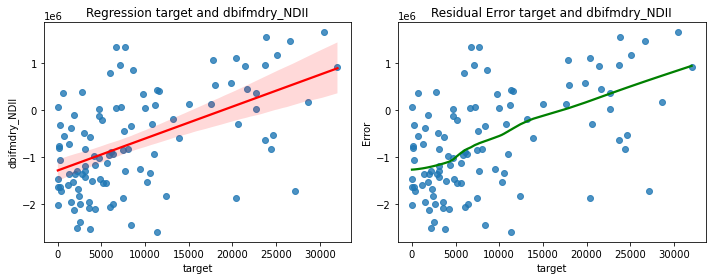

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_GDVI
dbifmdry_GDVI
Regression
slope:  11.660049577806783
intersept:  1296161.5838501905
r2:  0.339910763670184
P_value:  0.000364051896313724
std error:  3.1634288687813004


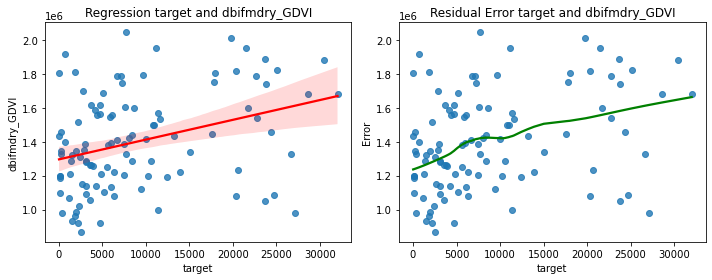

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_MSAVI
dbifmdry_MSAVI
Regression
slope:  38.511815522411176
intersept:  1520770.264998735
r2:  0.5756913343042108
P_value:  1.077052205945955e-10
std error:  5.363695994410295


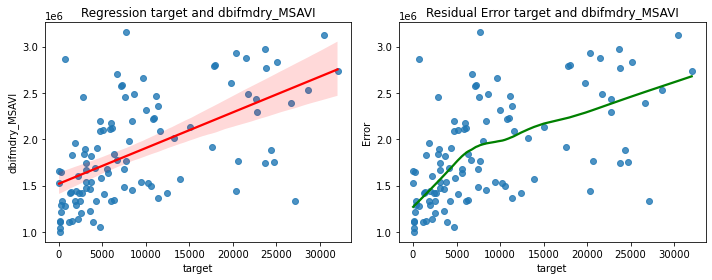

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_DVI
dbifmdry_DVI
Regression
slope:  19.5451304622919
intersept:  962460.8540164756
r2:  0.5102799796707603
P_value:  2.3008588171926177e-08
std error:  3.2301005118208277


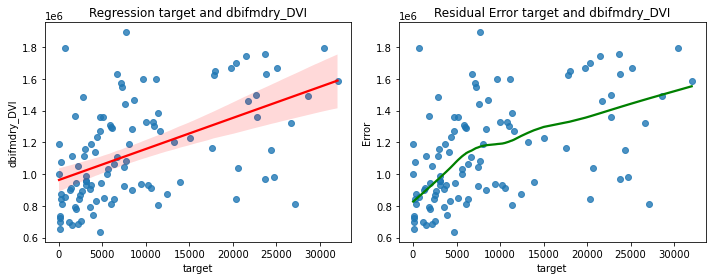

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_SAVI
dbifmdry_SAVI
Regression
slope:  42.46742762367834
intersept:  1756238.9243079857
r2:  0.5953379763192224
P_value:  1.688852086122756e-11
std error:  5.620154764380185


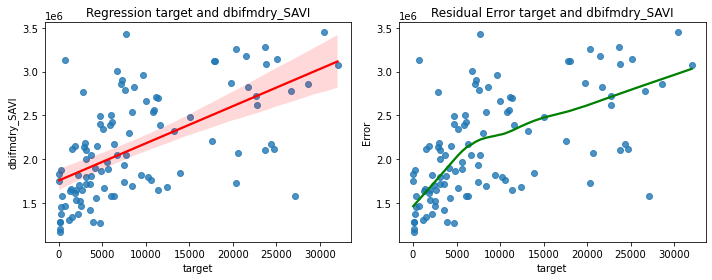

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_NDVI
dbifmdry_NDVI
Regression
slope:  93.24788656509782
intersept:  3036587.2990986877
r2:  0.6765269718030914
P_value:  1.730987668245785e-15
std error:  9.953172283182253


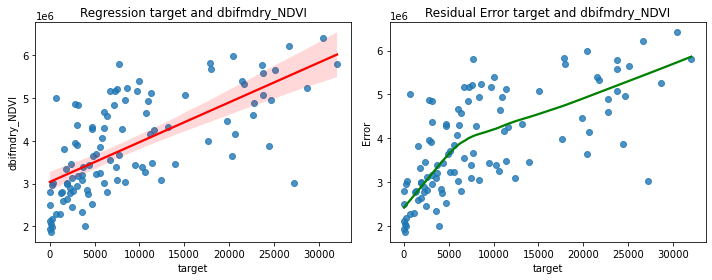

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071
dbifmdry_MSR
dbifmdry_MSR
Regression
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071


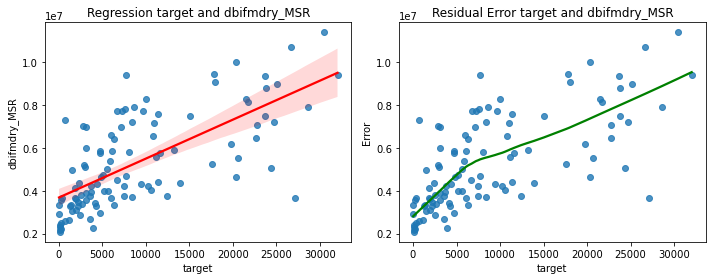

--------------------------------------------------
Residuals
slope:  181.83702791278628
intersept:  3682743.5642102705
r2:  0.688838073281355
P_value:  3.3090808281613407e-16
std error:  18.76444583014071


In [63]:
for i in df_ml.columns[1:]:
    print(i)
    value_x = 'target'
    value_y_loop = str(i)
    print(value_y_loop)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(data = df_ml, x=value_x, y =value_y_loop, line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y_loop])

    print("="*50)
    print("Regression")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(data=df_ml, x=value_x, y=value_y_loop, lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y])

    print("-"*50)
    print("Residuals")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

### Split off unseen data

In [67]:
# Creating a dataframe with 20%
# values of original dataframe
unseen_data = df_ml.sample(frac = 0.2)
 
# Creating dataframe with
# rest of the 80% values
model_data = df_ml.drop(unseen_data.index)

In [68]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()
#y_data_float=ydata.astype("float32")

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(59, 111) (59,)
(26, 111) (26,)


### Plot up Histograms for train and test datasets

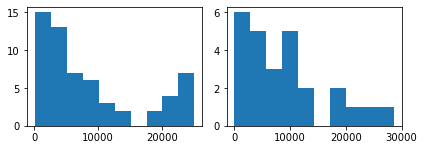

In [69]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [70]:
print(xdata1)

     fire_count  fire_min  fire_max  fire_mean  fire_sum  fire_std  fire_med  \
1         16.00     10.00     10.00      10.00    160.00      0.00     10.00   
3         20.00      5.00     10.00       9.75    195.00      1.09     10.00   
4         16.00      5.00      5.00       5.00     80.00      0.00      5.00   
6         20.00      0.00      0.00       0.00      0.00      0.00      0.00   
9         20.00      0.00      0.00       0.00      0.00      0.00      0.00   
..          ...       ...       ...        ...       ...       ...       ...   
168       25.00      0.00      0.00       0.00      0.00      0.00      0.00   
170       20.00      0.00      0.00       0.00      0.00      0.00      0.00   
175       16.00      0.00      0.00       0.00      0.00      0.00      0.00   
177       16.00      0.00      0.00       0.00      0.00      0.00      0.00   
183       20.00      0.00      0.00       0.00      0.00      0.00      0.00   

     fire_major  fire_minor  burnt_enco

In [71]:
print(ydata)

[8.3762158e+03 2.4670801e+04 3.0861599e+03 2.8320320e+03 6.6528003e+02
 4.2688799e+03 3.0861599e+03 1.3490400e+03 7.3919998e+01 9.9955098e+03
 1.7994760e+04 3.1231201e+03 1.0763322e+04 2.1469141e+04 2.2699391e+04
 1.1180400e+04 3.7422000e+03 2.2176001e+03 3.6483931e+03 4.7239990e+03
 7.7153999e+03 4.7171880e+03 4.8727769e+03 8.0314502e+03 3.1569021e+03
 5.5881421e+03 2.4414131e+04 1.7598352e+04 1.5361500e+03 1.1642400e+03
 4.7360132e+03 1.5490861e+03 1.2936000e+03 2.5408459e+03 1.7966666e+03
 2.3572266e+03 7.7112935e+03 3.9154500e+03 2.2152900e+03 6.8991998e+02
 3.6158325e+03 5.6064385e+03 5.1737070e+03 2.4740100e+03 2.3737561e+04
 8.4137900e+03 1.2432934e+04 1.0273340e+04 2.0359826e+04 7.4328101e+03
 7.2401177e+03 1.0569772e+04 2.9932466e+03 5.1178052e+03 4.3276240e+03
 5.8816987e+03 6.7264146e+03 4.1420864e+03 8.6271875e+03 2.0631123e+04
 2.3807330e+04 1.3212728e+04 1.3908650e+04 1.0982860e+04 1.7831346e+04
 2.1703027e+04 2.8623980e+04 3.6960001e+02 2.0381025e+04 6.0944277e+03
 1.136

In [72]:
# Prepare data
#X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.3, random_state=42)

# Define Random Forest classifier
rf = rfr()

# Define parameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
    'max_depth': [None, 2, 3, 4, 5, 10, 20],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_

# Evaluate model performance
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)

print("Best parameters:", best_params)
print("Test accuracy:", test_accuracy)

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Test accuracy: 0.6531206468840063


C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  category=UserWarning,


## Veg and indicies

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 50}

    Test accuracy: 0.6268057302141554
        
        min n_setimators = 50

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 2}

    Test accuracy: 0.7000961702235816

## Veg only

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 2}

    Test accuracy: 0.7000961702235816
        
        cv=5

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 2}

    Test accuracy: 0.5877821429617505
    
    cv=3

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}

    Test accuracy: 0.6558192116434494

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}

    Test accuracy: 0.720199762528393

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}

Test accuracy: 0.6999698307848703

In [ ]:
# rng = np.random.RandomState(1)
# rfrModel_1 = abr(dtr(max_depth=4), n_estimators=300, random_state=rng)
# rfrModel_1

In [ ]:
# rfrModel_1 = gbr(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0, loss='ls')
# rfrModel_1

In [ ]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
np.nan_to_num(X_1)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [73]:
#rfrLCHM = rfrModel_1.fit(X_1, y_1)
rfrLCHM = best_rf.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

Fitted model r2 = 0.94
Fitted model mse = 4051216.90
n = 59


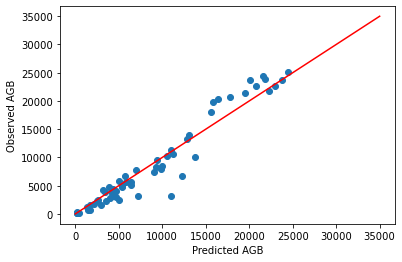

In [74]:
feature_importance = rfrLCHM.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrLCHM.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_rf_train.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

Predicted data r2 = 0.2383977134761336
MSE = 43555450.645
RMSE = 6599.655
bias = -2641.624
n = 26


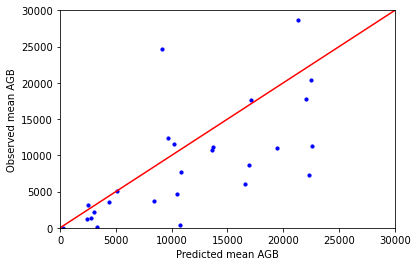

In [75]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_test_data.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

                 band                      n
72   b1_dbifm_dry_p99  9.589398726948825e-06
49         b1_hmc_p50  9.168634086616147e-05
63   b1_dp1fm_dry_p50   8.28687358634505e-05
51        b1_hcv_mean  8.053346187498399e-06
25   tot_avg_emse_wet  7.959015912800042e-06
..                ...                    ...
1            fire_min                    0.0
7          fire_major                    0.0
5            fire_std                    0.0
57   b1_fdc_dry_major                    0.0
76  b3_dbifm_dry_mean                    0.0

[111 rows x 2 columns]


<Figure size 720x432 with 0 Axes>

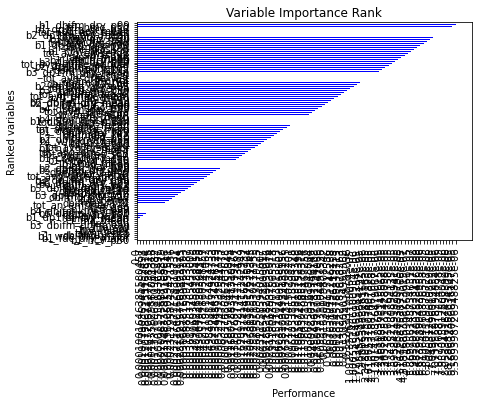

In [76]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_Band_Importance_Score.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

### Predict the selected model on the test data

In [77]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [78]:
df_band.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    111 non-null    object
 1   n       111 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [79]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 72 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    111 non-null    object
 1   n       111 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 72 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    111 non-null    object 
 1   n       111 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [80]:
#Plot has value at the top with very small n value 

In [86]:
#Plot has value at the top with very small n value 
df_var = dfsort.head(20)

In [87]:
#df_var = dfsort[dfsort['n'] > 0.01]

In [88]:
column_var = df_var.band.tolist()

In [89]:
column_var.insert(0, 'target')

In [90]:
column_var

['target',
 'b1_dbifm_dry_p99',
 'b1_hmc_p50',
 'b1_dp1fm_dry_p50',
 'b1_hcv_mean',
 'tot_avg_emse_wet',
 'b2_dp1fm_dry_mean',
 'dbifmdry_NDII',
 'b1_wfp_dry_p50',
 'dbifmdry_SAVI',
 'tot_avg_drse_djf',
 'b1_dp1fm_dry_p99',
 'dbifmdry_DVI',
 'fire_pois1_2',
 'b1_ccw_dry_p99',
 'tot_avg_emse_djf',
 'since_fire',
 'rain_d_mean',
 'tmin_mean',
 'b1_wfp_dry_p99',
 'b3_dbifm_dry_p50']

In [91]:
model_data

target  fire_count  fire_min  fire_max  fire_mean  fire_sum  fire_std  \
1    8376.22          16        10        10      10.00       160      0.00   
3   24670.80          20         5        10       9.75       195      1.09   
4    3086.16          16         5         5       5.00        80      0.00   
6    2832.03          20         0         0       0.00         0      0.00   
9     665.28          20         0         0       0.00         0      0.00   
..       ...         ...       ...       ...        ...       ...       ...   
168  6699.00          25         0         0       0.00         0      0.00   
170    73.92          20         0         0       0.00         0      0.00   
175 11596.20          16         0         0       0.00         0      0.00   
177 11338.13          16         0         0       0.00         0      0.00   
183   240.24          20         0         0       0.00         0      0.00   

     fire_med  fire_major  fire_minor  ...  dbifmdry_NDGI  dbifmdry_RI  \
1       10.00          10          10  ...    -1341991.00   1341991.00   
3       10.00          10           5  ...    -1173184.00   1173184.00   
4        5.00           5           5  ...    -1255729.00   1255729.00   
6        0.00           0           0  ...    -1649555.00   1649555.00   
9        0.00           0           0  ...     -723252.00    723252.00   
..        ...         ...         ...  ...            ...          ...   
168      0.00           0           0  ...    -1781305.00   1781305.00   
170      0.00           0           0  ...    -2095539.00   2095539.00   
175      0.00           0           0  ...    -1823204.00   1823204.00   
177      0.00           0           0  ...    -1640212.00   1640212.00   
183      0.00           0           0  ...    -1751216.00   1751216.00   

     dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  dbifmdry_DVI  \
1         2881356        -338983        1438000         2197130       1283000   
3         2241024        -539075        1088000         1753382        983000   
4         2197205        -836979        1094000         1668140        957000   
6         1178145       -1367033        1354000         1841765       1113000   
9         3374751         357968        1915000         2866948       1794000   
..            ...            ...            ...             ...           ...   
168       1958062          54801        1411000         1781576       1108000   
170         34063       -2021668        1185000         1106176        720000   
175       2160229         416667        1533000         2086585       1269000   
177       3674699         420811        1569000         2358574       1383000   
183       -653378       -1646321        1345000         1214483        841000   

     dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
1          2534571        4947937    7201101.00  
3          2111557        4957136    7222079.00  
4          1997912        4379863    5995724.00  
6          2136276        3953819    5191686.00  
9          3133442        5000000    7320508.00  
..             ...            ...           ...  
168        2048817        3560411    4511335.00  
170        1285102        2115159    2395615.00  
175        2385039        4256961    5755877.00  
177        2693107        5116537    7593904.00  
183        1367776        1991475    2236580.00  

[85 rows x 112 columns]

In [92]:
select_df = model_data[column_var]

In [93]:
df_corr = select_df.corr()
df_corr

target  b1_dbifm_dry_p99  b1_hmc_p50  b1_dp1fm_dry_p50  \
target               1.00             -0.66        0.69             -0.31   
b1_dbifm_dry_p99    -0.66              1.00       -0.61              0.46   
b1_hmc_p50           0.69             -0.61        1.00             -0.30   
b1_dp1fm_dry_p50    -0.31              0.46       -0.30              1.00   
b1_hcv_mean          0.05             -0.31       -0.04              0.08   
tot_avg_emse_wet     0.08             -0.23        0.10             -0.34   
b2_dp1fm_dry_mean    0.64             -0.71        0.79             -0.42   
dbifmdry_NDII        0.53             -0.41        0.76             -0.16   
b1_wfp_dry_p50       0.64             -0.66        0.78             -0.38   
dbifmdry_SAVI        0.62             -0.64        0.77             -0.49   
tot_avg_drse_djf     0.51             -0.41        0.66             -0.20   
b1_dp1fm_dry_p99    -0.33              0.47       -0.31              0.97   
dbifmdry_DVI         0.54             -0.50        0.72             -0.46   
fire_pois1_2         0.37             -0.34        0.48             -0.17   
b1_ccw_dry_p99       0.62             -0.69        0.76             -0.38   
tot_avg_emse_djf     0.44             -0.51        0.43             -0.39   
since_fire          -0.19              0.01       -0.24              0.01   
rain_d_mean         -0.06             -0.06       -0.05             -0.05   
tmin_mean            0.03             -0.00        0.08             -0.16   
b1_wfp_dry_p99       0.61             -0.68        0.75             -0.39   
b3_dbifm_dry_p50    -0.60              0.90       -0.58              0.44   

                   b1_hcv_mean  tot_avg_emse_wet  b2_dp1fm_dry_mean  \
target                    0.05              0.08               0.64   
b1_dbifm_dry_p99         -0.31             -0.23              -0.71   
b1_hmc_p50               -0.04              0.10               0.79   
b1_dp1fm_dry_p50          0.08             -0.34              -0.42   
b1_hcv_mean               1.00              0.13               0.03   
tot_avg_emse_wet          0.13              1.00               0.12   
b2_dp1fm_dry_mean         0.03              0.12               1.00   
dbifmdry_NDII            -0.27              0.02               0.76   
b1_wfp_dry_p50           -0.05              0.04               0.95   
dbifmdry_SAVI            -0.10              0.17               0.92   
tot_avg_drse_djf          0.13              0.16               0.54   
b1_dp1fm_dry_p99          0.07             -0.30              -0.43   
dbifmdry_DVI             -0.21              0.15               0.86   
fire_pois1_2              0.16              0.04               0.43   
b1_ccw_dry_p99            0.10              0.12               0.95   
tot_avg_emse_djf          0.30              0.71               0.40   
since_fire               -0.09             -0.16              -0.09   
rain_d_mean               0.02              0.09               0.08   
tmin_mean                 0.07              0.36               0.07   
b1_wfp_dry_p99            0.05              0.10               0.95   
b3_dbifm_dry_p50         -0.38             -0.18              -0.74   

                   dbifmdry_NDII  b1_wfp_dry_p50  dbifmdry_SAVI  ...  \
target                      0.53            0.64           0.62  ...   
b1_dbifm_dry_p99           -0.41           -0.66          -0.64  ...   
b1_hmc_p50                  0.76            0.78           0.77  ...   
b1_dp1fm_dry_p50           -0.16           -0.38          -0.49  ...   
b1_hcv_mean                -0.27           -0.05          -0.10  ...   
tot_avg_emse_wet            0.02            0.04           0.17  ...   
b2_dp1fm_dry_mean           0.76            0.95           0.92  ...   
dbifmdry_NDII               1.00            0.78           0.85  ...   
b1_wfp_dry_p50              0.78            1.00           0.90  ...   
dbifmdry_SAVI               0.85         

In [94]:
dfsort.to_csv(os.path.join(output_, "{0}_rf_variable_score.csv".format(var_)))
df_corr.to_csv(os.path.join(output_, "{0}_rf_select_variable_corrolation.csv".format(var_)))

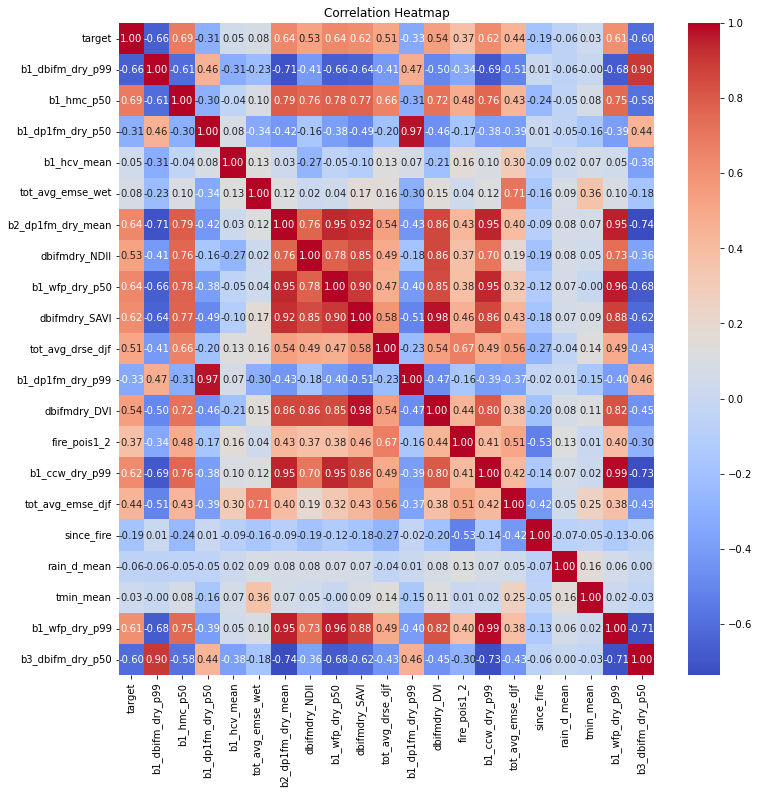

In [95]:
# Create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_variable_score.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [96]:
select_df

target  b1_dbifm_dry_p99  b1_hmc_p50  b1_dp1fm_dry_p50  b1_hcv_mean  \
1    8376.22            389.92      105.91             12.00       169.41   
3   24670.80            262.34      105.15              9.50       157.61   
4    3086.16            339.76      104.52              6.00       163.29   
6    2832.03            408.57      104.19              2.00       161.33   
9     665.28            489.78      104.49              4.00       141.31   
..       ...               ...         ...               ...          ...   
168  6699.00            458.24      107.03             25.00       158.12   
170    73.92            609.96      104.94              8.00       143.06   
175 11596.20            406.40      105.92             25.00       141.90   
177 11338.13            349.70      109.58              3.00       158.99   
183   240.24            787.13      102.20             35.50       140.04   

     tot_avg_emse_wet  b2_dp1fm_dry_mean  dbifmdry_NDII  b1_wfp_dry_p50  \
1              648.30              32.22        -338983           44.00   
3              615.70              37.25        -539075           36.00   
4              621.00              33.78        -836979           29.00   
6              655.70              22.50       -1367033           16.50   
9              448.10              59.33         357968           65.00   
..                ...                ...            ...             ...   
168            584.30              29.67          54801           22.00   
170            605.00               4.00       -2021668            1.00   
175            611.75              34.89         416667           31.00   
177           1056.10              43.19         420811           42.00   
183            442.60               5.75       -1646321            2.50   

     dbifmdry_SAVI  ...  b1_dp1fm_dry_p99  dbifmdry_DVI  fire_pois1_2  \
1          2534571  ...             13.00       1283000          6.49   
3          2111557  ...             11.00        983000          2.57   
4          1997912  ...              6.92        957000          9.43   
6          2136276  ...              3.89       1113000          3.77   
9          3133442  ...              5.89       1794000          0.00   
..             ...  ...               ...           ...           ...   
168        2048817  ...             31.68       1108000          0.20   
170        1285102  ...             12.84        720000          9.43   
175        2385039  ...             35.28       1269000          0.00   
177        2693107  ...              5.85       1383000         21.11   
183        1367776  ...             37.89        841000          0.73   

     b1_ccw_dry_p99  tot_avg_emse_djf  since_fire  rain_d_mean  tmin_mean  \
1             72.76            331.00           3         0.00       9.10   
3             60.00            314.10           6         0.00       5.50   
4             58.00            316.50           3         0.00       5.60   
6             39.00            335.40           2         0.00       5.30   
9             90.00            237.10          25         0.00       7.80   
..              ...               ...         ...          ...        ...   
168           52.52            284.50           9         0.00      11.90   
170            2.00            293.40           2         0.00       6.20   
175           55.84            294.65          25         0.00       6.80   
177           80.00            453.00           1         0.00      19.20   
183            6.00            217.10           1         0.00       9.20   

     b1_wfp_dry_p99  b3_dbifm_dry_p50  
1             49.76            654.00  
3             39.00            500.50  
4             37.00            619.00  
6             23.00            843.50  
9             71.00            899.50  
..              ...               ...  
168           32.68            993.00  
170            1.00           1370.00  
175           35.8

# Rerun on Selected data

In [97]:
xdata1 = select_df.iloc[:, 1:].astype('float32')
ydata1 = select_df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(59, 20) (59,)
(26, 20) (26,)


In [98]:
rng = np.random.RandomState(1)
rfrModel_1 = rfr(n_estimators=100, random_state=rng)
#rfrModel_1 = rfr(dtr(max_depth=None), n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=rng)
rfrModel_1

#Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

RandomForestRegressor(random_state=RandomState(MT19937) at 0x201667A77B8)

In [99]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [100]:
select_df

target  b1_dbifm_dry_p99  b1_hmc_p50  b1_dp1fm_dry_p50  b1_hcv_mean  \
1    8376.22            389.92      105.91             12.00       169.41   
3   24670.80            262.34      105.15              9.50       157.61   
4    3086.16            339.76      104.52              6.00       163.29   
6    2832.03            408.57      104.19              2.00       161.33   
9     665.28            489.78      104.49              4.00       141.31   
..       ...               ...         ...               ...          ...   
168  6699.00            458.24      107.03             25.00       158.12   
170    73.92            609.96      104.94              8.00       143.06   
175 11596.20            406.40      105.92             25.00       141.90   
177 11338.13            349.70      109.58              3.00       158.99   
183   240.24            787.13      102.20             35.50       140.04   

     tot_avg_emse_wet  b2_dp1fm_dry_mean  dbifmdry_NDII  b1_wfp_dry_p50  \
1              648.30              32.22        -338983           44.00   
3              615.70              37.25        -539075           36.00   
4              621.00              33.78        -836979           29.00   
6              655.70              22.50       -1367033           16.50   
9              448.10              59.33         357968           65.00   
..                ...                ...            ...             ...   
168            584.30              29.67          54801           22.00   
170            605.00               4.00       -2021668            1.00   
175            611.75              34.89         416667           31.00   
177           1056.10              43.19         420811           42.00   
183            442.60               5.75       -1646321            2.50   

     dbifmdry_SAVI  ...  b1_dp1fm_dry_p99  dbifmdry_DVI  fire_pois1_2  \
1          2534571  ...             13.00       1283000          6.49   
3          2111557  ...             11.00        983000          2.57   
4          1997912  ...              6.92        957000          9.43   
6          2136276  ...              3.89       1113000          3.77   
9          3133442  ...              5.89       1794000          0.00   
..             ...  ...               ...           ...           ...   
168        2048817  ...             31.68       1108000          0.20   
170        1285102  ...             12.84        720000          9.43   
175        2385039  ...             35.28       1269000          0.00   
177        2693107  ...              5.85       1383000         21.11   
183        1367776  ...             37.89        841000          0.73   

     b1_ccw_dry_p99  tot_avg_emse_djf  since_fire  rain_d_mean  tmin_mean  \
1             72.76            331.00           3         0.00       9.10   
3             60.00            314.10           6         0.00       5.50   
4             58.00            316.50           3         0.00       5.60   
6             39.00            335.40           2         0.00       5.30   
9             90.00            237.10          25         0.00       7.80   
..              ...               ...         ...          ...        ...   
168           52.52            284.50           9         0.00      11.90   
170            2.00            293.40           2         0.00       6.20   
175           55.84            294.65          25         0.00       6.80   
177           80.00            453.00           1         0.00      19.20   
183            6.00            217.10           1         0.00       9.20   

     b1_wfp_dry_p99  b3_dbifm_dry_p50  
1             49.76            654.00  
3             39.00            500.50  
4             37.00            619.00  
6             23.00            843.50  
9             71.00            899.50  
..              ...               ...  
168           32.68            993.00  
170            1.00           1370.00  
175           35.8

## Re-train model on selected paramiters

Fitted model r2 = 0.93
Fitted model mse = 4763632.42
n = 59


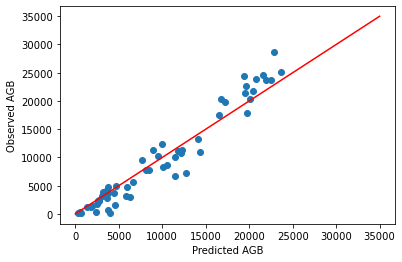

In [101]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_selectedrf_train.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

Predicted data r2 = 0.2392237386086058
MSE = 27241983.112
RMSE = 5219.385
bias = -762.097
n = 26


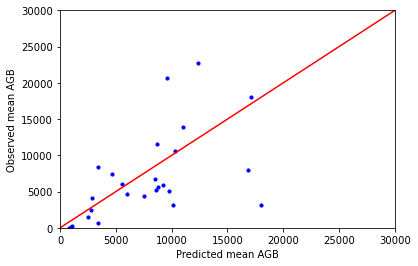

In [102]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_selected_rf_test_data.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [103]:
variable_imp_list = dfsort.band.to_list()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open('rfr_modelName_nt100_n17', 'wb') as f:
    pickle.dump(rfrLCHM, f)

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

unseen_data

In [ ]:
c_list = unseen_data.columns.tolist()
c_list

In [ ]:
df = unseen_data[column_var]

In [ ]:
df

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['target'] > 0.0)]
df1.dropna(inplace=True)
print (df1.shape)

In [ ]:
# dfx = df1[:1]
# dfy = df1[1:]

In [ ]:
df1.columns

In [ ]:
column_var

In [ ]:
df1[column_var].info()

In [ ]:
df1

In [ ]:
list(df1.columns)

In [ ]:
# xdata2 = df1['target'].astype('float32')

# ydata1 = df1.drop('target', axis=1).astype('float32')
# #df1.drop("target", axis=1, inplace=True)


# ydata2 = ydata1.values

# ydata = ydata2.ravel()

# print(len(ydata))
# #ydata

In [ ]:
xdata2 = df1.iloc[:, 1:].astype('float32')
ydata1 = df1[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata3 = ydata2.ravel()

ydata = ydata3.reshape(-1, 1)

In [ ]:
xdata1.shape

In [ ]:
ydata.shape

In [ ]:
with open('rfr_modelName_nt100_n17', 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_78.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_l57.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()